In [1]:
#Import all data cleaning and visualization libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=None

- Read csv file

In [2]:
show1=pd.read_csv('train.csv')
show1.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


- Drop an useless columns

In [3]:
show1.drop(['Name','ID','Customer_ID','SSN','Type_of_Loan'],axis=1,inplace=True)

In [4]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,object,"[23, -500, 28_, 28, 34, 54, 55, 21, 31, 33, 34...",1788,0
2,Occupation,object,"[Scientist, _______, Teacher, Engineer, Entrep...",16,0
3,Annual_Income,object,"[19114.12, 34847.84, 34847.84_, 143162.64, 306...",18940,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, nan, 3037.986666666666, 1...",13235,15002
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 1414, 1231,...",943,0
6,Num_Credit_Card,int64,"[4, 1385, 5, 1288, 1, 7, 6, 1029, 488, 8, 1381...",1179,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 5318, 15, 7, 12, 20, 1, 433, 1...",1750,0
8,Num_of_Loan,object,"[4, 1, 3, 967, -100, 0, 0_, 2, 3_, 2_, 7, 5, 5...",434,0
9,Delay_from_due_date,int64,"[3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11...",73,0


# Correlation

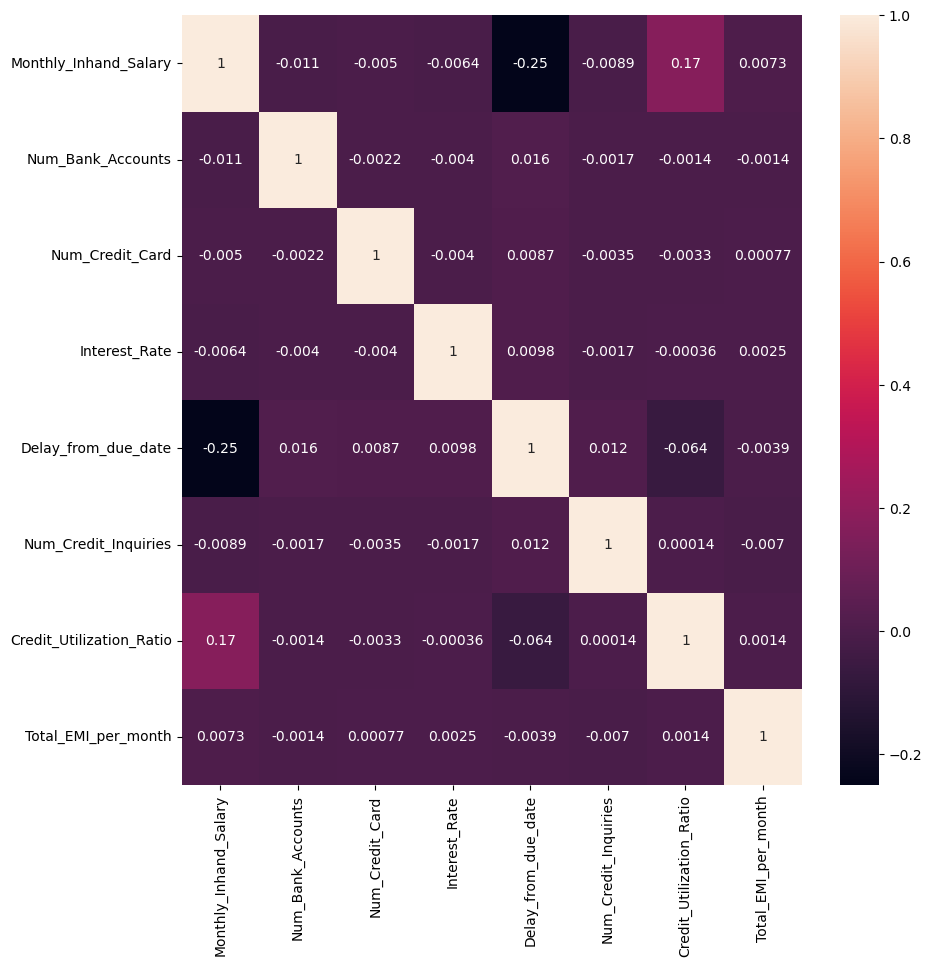

In [5]:
plt.figure(figsize = (10,10))
sns.heatmap(show1.corr(),annot=True)
plt.show()

# 1.*Month


In [6]:
show1['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [7]:
show1['Month']=show1['Month'].str.strip()

<AxesSubplot:xlabel='Month', ylabel='count'>

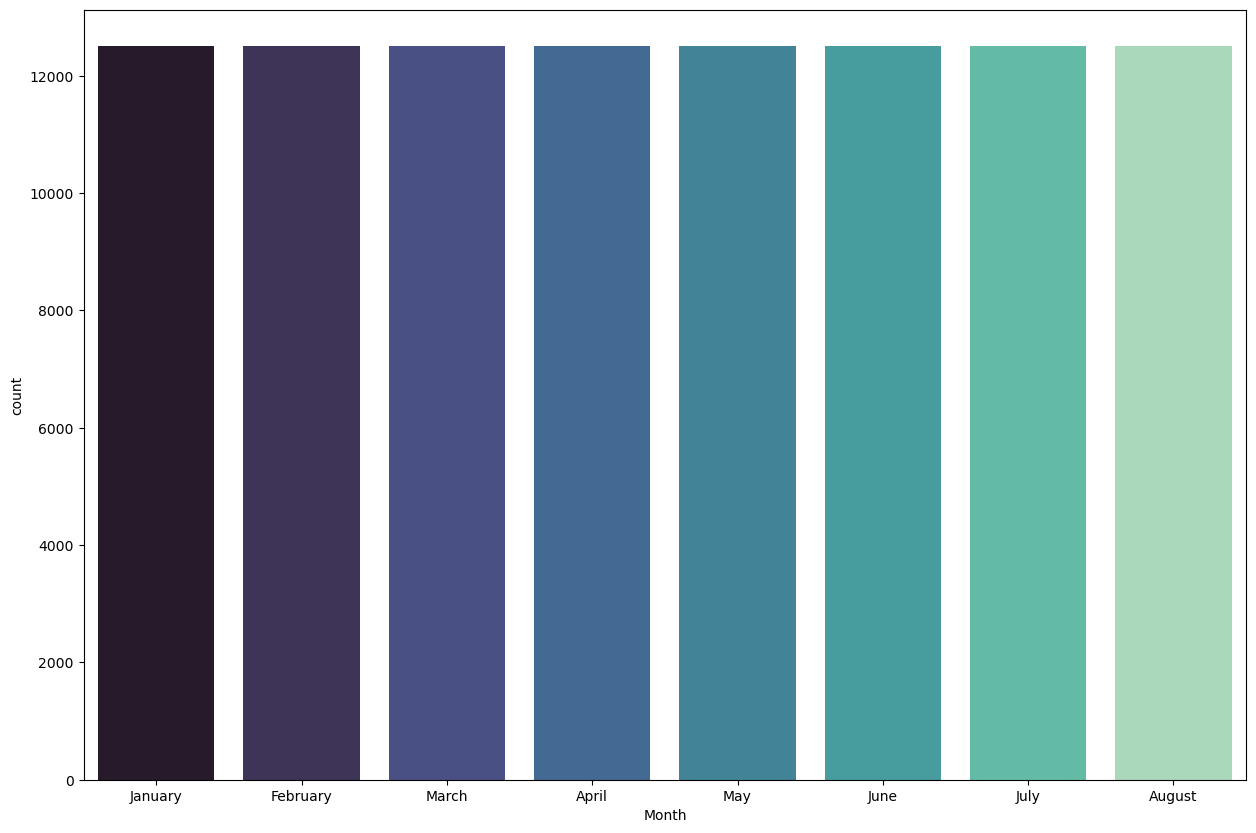

In [8]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Month' ,data=show1,palette="mako")

In [9]:
show1['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

# 2.Age

In [10]:
show1['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [11]:
show1['Age'] = show1['Age'].str.replace('-','')
show1['Age'] = show1['Age'].str.replace('_','')
show1['Age'] = show1['Age'].astype(int)

In [12]:
show1.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,119.509700,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,684.757313,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,14.000000,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,25.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,34.000000,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,8698.000000,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


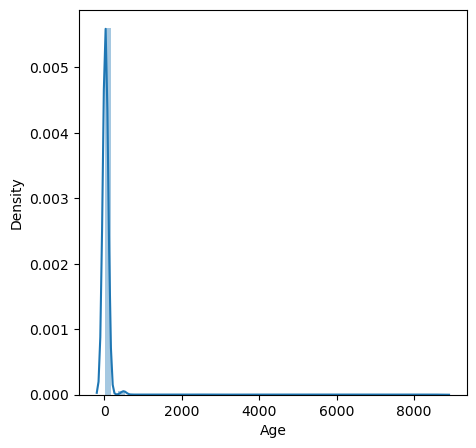

In [13]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Age'])
plt.show()

In [14]:
def check_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    
    outliers=False
    
    for i in range(len(show1)):
        value=show1.loc[i,col]
        if value>upper_limit or value<lower_limit:
            outliers=True
    return outliers

In [15]:
def handle_outliers(col,show1):
    Q1=show1[col].quantile(0.25)
    Q3=show1[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    
    for i in range(len(show1)):
        
        if show1.loc[i,col]>upper_limit:
            show1.loc[i,col]=upper_limit
        elif show1.loc[i,col]<lower_limit:
            show1.loc[i,col]=lower_limit

In [16]:
def check_Negative(col,show1):
    Neg=False  
    for i in range(len(show1)):
        value=show1.loc[i,col]
        if value<0:
            Neg=True
                  
    return Neg

In [17]:
def change_Negative(col,show1):
    
    for i in range(len(show1)):
        
        if show1.loc[i,col] <0:
            show1.loc[i,col]=0

In [18]:
check_outliers('Age',show1)

True

In [19]:
handle_outliers('Age',show1)

In [20]:
check_outliers('Age',show1)

False

In [21]:
check_Negative('Age',show1)


False

In [22]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

# 3.-Monthly_Inhand_Salary

In [23]:
show1['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [24]:
median=show1['Monthly_Inhand_Salary'].median()
show1['Monthly_Inhand_Salary'].fillna(median,inplace=True)

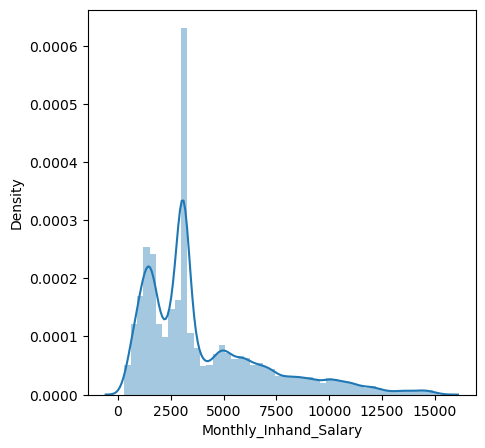

In [25]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Monthly_Inhand_Salary'])
plt.show()

In [26]:
check_outliers('Monthly_Inhand_Salary',show1)

True

In [27]:
handle_outliers('Monthly_Inhand_Salary',show1)

In [28]:
check_outliers('Monthly_Inhand_Salary',show1)

False

In [29]:
check_Negative('Monthly_Inhand_Salary',show1)


False

# 4.Num_Bank_Accounts

In [30]:
show1['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

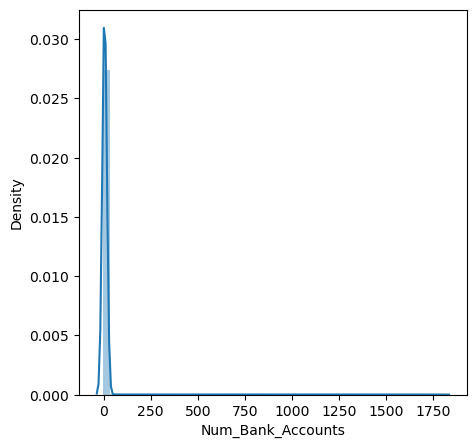

In [31]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Num_Bank_Accounts'])
plt.show()

In [32]:
check_outliers('Num_Bank_Accounts',show1)

True

In [33]:
handle_outliers('Num_Bank_Accounts',show1)

In [34]:
check_outliers('Num_Bank_Accounts',show1)

False

In [35]:
check_Negative('Num_Bank_Accounts',show1)


True

In [36]:
change_Negative('Num_Bank_Accounts',show1)

In [37]:
check_Negative('Num_Bank_Accounts',show1)


False

# 5.Num_Credit_Card

In [38]:
show1['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  955, 1430,  679], dtype=int64)

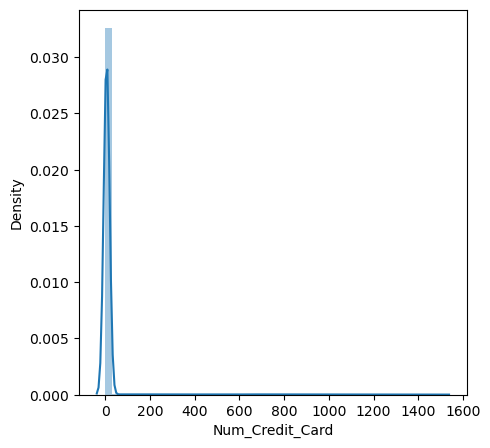

In [39]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Num_Credit_Card'])
plt.show()

In [40]:
check_outliers('Num_Credit_Card',show1)

True

In [41]:
handle_outliers('Num_Credit_Card',show1)

In [42]:
check_outliers('Num_Credit_Card',show1)

False

In [43]:
check_Negative('Num_Credit_Card',show1)


False

# 6.Interest_Rate

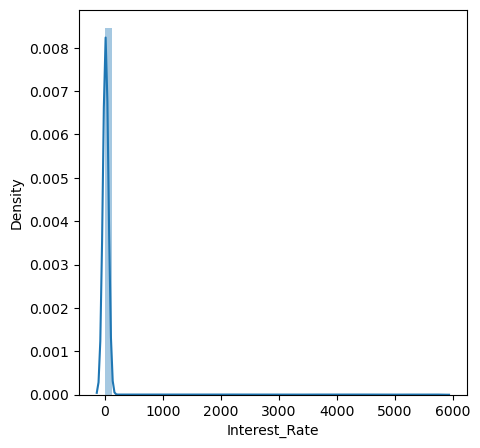

In [44]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Interest_Rate'])
plt.show()

In [45]:
check_outliers('Interest_Rate',show1)

True

In [46]:
handle_outliers('Interest_Rate',show1)

In [47]:
check_outliers('Interest_Rate',show1)

False

In [48]:
check_Negative('Interest_Rate',show1)

False

# 7.Delay_from_due_date.

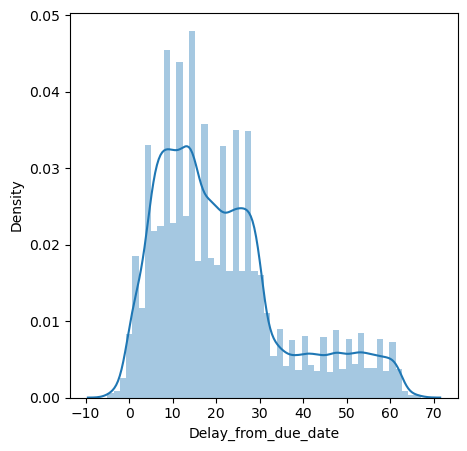

In [49]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Delay_from_due_date'])
plt.show()

In [50]:
check_outliers('Delay_from_due_date',show1)

True

In [51]:
handle_outliers('Delay_from_due_date',show1)

In [52]:
check_outliers('Delay_from_due_date',show1)

False

In [53]:
check_Negative('Delay_from_due_date',show1)

True

In [54]:
change_Negative('Delay_from_due_date',show1)

In [55]:
check_Negative('Delay_from_due_date',show1)

False

# 8.Num_Credit_Inquiries

In [56]:
median=show1['Num_Credit_Inquiries'].median()
show1['Num_Credit_Inquiries'].fillna(median,inplace=True)

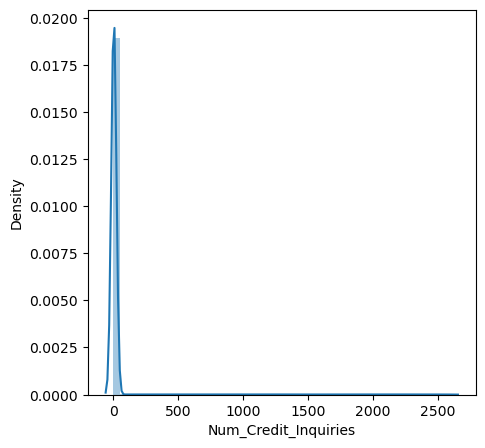

In [57]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Num_Credit_Inquiries'])
plt.show()

In [58]:
check_outliers('Num_Credit_Inquiries',show1)

True

In [59]:
handle_outliers('Num_Credit_Inquiries',show1)

In [60]:
check_outliers('Num_Credit_Inquiries',show1)

False

In [61]:
check_Negative('Num_Credit_Inquiries',show1)


False

# 9.Credit_Utilization_Ratio

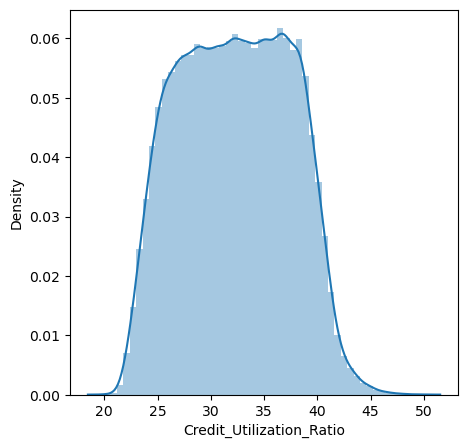

In [62]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Credit_Utilization_Ratio'])
plt.show()

In [63]:
check_outliers('Credit_Utilization_Ratio',show1)

True

In [64]:
handle_outliers('Credit_Utilization_Ratio',show1)

In [65]:
check_outliers('Credit_Utilization_Ratio',show1)

False

In [66]:
check_Negative('Credit_Utilization_Ratio',show1)


False

# 10.Total_EMI_per_month

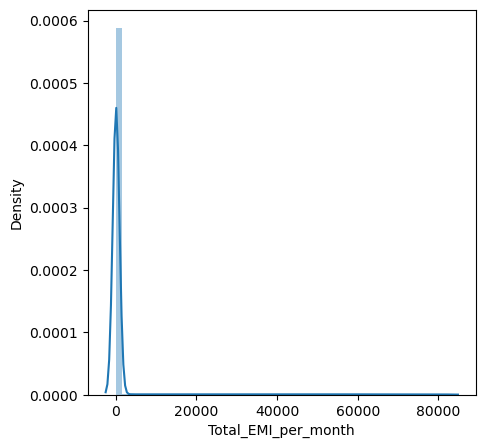

In [67]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Total_EMI_per_month'])
plt.show()

In [68]:
check_outliers('Total_EMI_per_month',show1)

True

In [69]:
handle_outliers('Total_EMI_per_month',show1)

In [70]:
check_outliers('Total_EMI_per_month',show1)

False

In [71]:
check_Negative('Total_EMI_per_month',show1)


False

# 11.Occupation

In [72]:
show1['Occupation'] = show1['Occupation'].str.replace('_______','Data Scientist')
show1['Occupation'] = show1['Occupation'].astype(object)

In [73]:
show1['Occupation']=show1['Occupation'].str.strip()

<AxesSubplot:xlabel='Occupation', ylabel='count'>

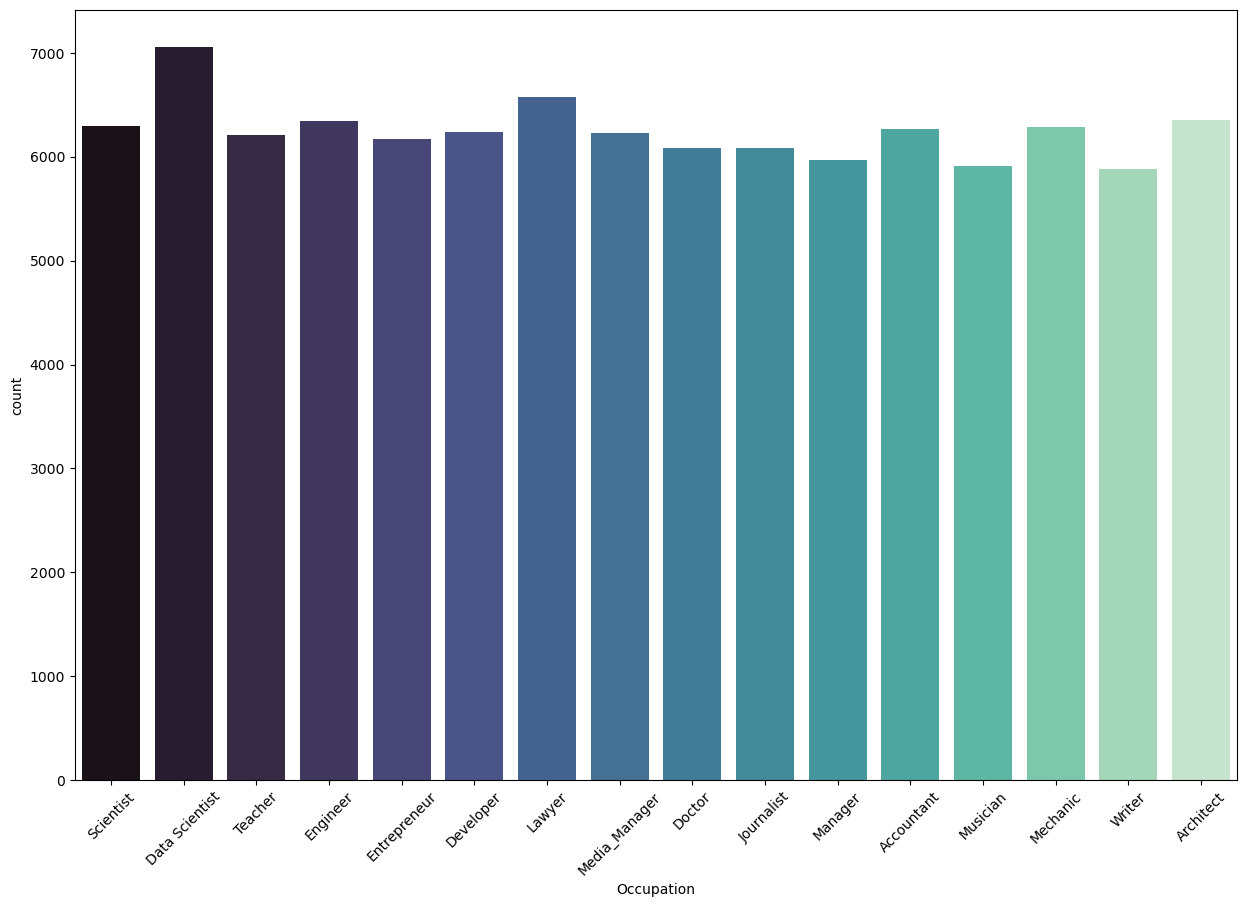

In [74]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
sns.countplot(x= 'Occupation' ,data=show1,palette="mako")

In [75]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,float64,"[23.0, 67.5, 28.0, 34.0, 54.0, 55.0, 21.0, 31....",44,0
2,Occupation,object,"[Scientist, Data Scientist, Teacher, Engineer,...",16,0
3,Annual_Income,object,"[19114.12, 34847.84, 34847.84_, 143162.64, 306...",18940,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, 3093.745000000001, 3037.9...",12559,0
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 13, 11]",13,0
6,Num_Credit_Card,float64,"[4.0, 11.5, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0,...",13,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 38, 15, 7, 12, 20, 1, 14, 32, ...",35,0
8,Num_of_Loan,object,"[4, 1, 3, 967, -100, 0, 0_, 2, 3_, 2_, 7, 5, 5...",434,0
9,Delay_from_due_date,int64,"[3, 0, 5, 6, 8, 7, 13, 10, 4, 9, 1, 12, 11, 30...",56,0


# 12.Annual_Income

In [76]:
show1['Annual_Income'] = show1['Annual_Income'].str.replace('-','')
show1['Annual_Income'] = show1['Annual_Income'].str.replace('_','')
show1['Annual_Income'] = show1['Annual_Income'].astype(float)

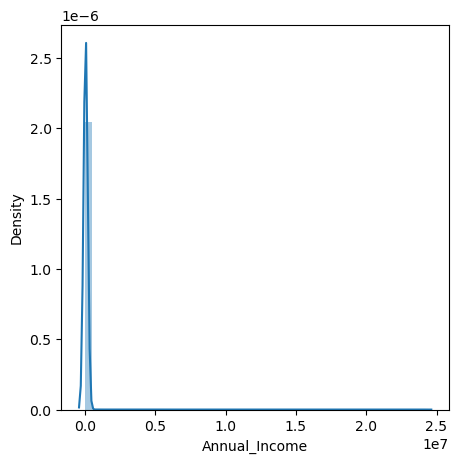

In [77]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Annual_Income'])
plt.show()

In [78]:
check_outliers('Annual_Income',show1)

True

In [79]:
handle_outliers('Annual_Income',show1)

In [80]:
check_outliers('Annual_Income',show1)

False

In [81]:
check_Negative('Annual_Income',show1)


False

# 13.Num_of_Loan

In [82]:
show1['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [83]:
show1['Num_of_Loan'] = show1['Num_of_Loan'].str.replace('-','')
show1['Num_of_Loan'] = show1['Num_of_Loan'].str.replace('_','')
show1['Num_of_Loan'] = show1['Num_of_Loan'].astype(int)

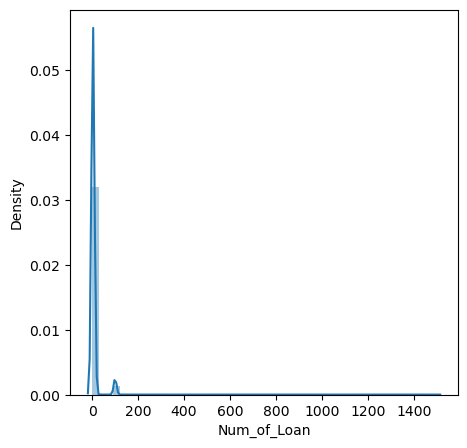

In [84]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Num_of_Loan'])
plt.show()

In [85]:
check_outliers('Num_of_Loan',show1)

True

In [86]:
handle_outliers('Num_of_Loan',show1)

In [87]:
check_outliers('Num_of_Loan',show1)

False

In [88]:
check_Negative('Num_of_Loan',show1)


False

# 14.Num_of_Delayed_Payment

In [89]:
show1['Num_of_Delayed_Payment'] = show1['Num_of_Delayed_Payment'].str.replace('-','')
show1['Num_of_Delayed_Payment'] = show1['Num_of_Delayed_Payment'].str.replace('_','')
show1['Num_of_Delayed_Payment'] = show1['Num_of_Delayed_Payment'].astype(float)

In [90]:
median=show1['Num_of_Delayed_Payment'].median()
show1['Num_of_Delayed_Payment'].fillna(median,inplace=True)

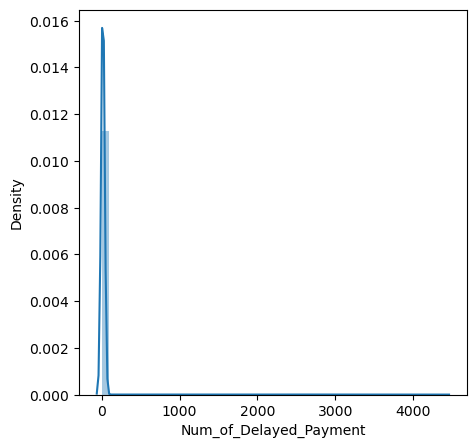

In [91]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Num_of_Delayed_Payment'])
plt.show()

In [92]:
check_outliers('Num_of_Delayed_Payment',show1)

True

In [93]:
handle_outliers('Num_of_Delayed_Payment',show1)

In [94]:
check_outliers('Num_of_Delayed_Payment',show1)

False

In [95]:
check_Negative('Num_of_Delayed_Payment',show1)


False

In [96]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

# 15.Changed_Credit_Limit

In [97]:
show1['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [98]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,float64,"[23.0, 67.5, 28.0, 34.0, 54.0, 55.0, 21.0, 31....",44,0
2,Occupation,object,"[Scientist, Data Scientist, Teacher, Engineer,...",16,0
3,Annual_Income,float64,"[19114.12, 34847.84, 143162.64, 30689.89, 3554...",12264,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, 3093.745000000001, 3037.9...",12559,0
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 13, 11]",13,0
6,Num_Credit_Card,float64,"[4.0, 11.5, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0,...",13,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 38, 15, 7, 12, 20, 1, 14, 32, ...",35,0
8,Num_of_Loan,int32,"[4, 1, 3, 12, 0, 2, 7, 5, 6, 8, 9]",11,0
9,Delay_from_due_date,int64,"[3, 0, 5, 6, 8, 7, 13, 10, 4, 9, 1, 12, 11, 30...",56,0


In [99]:
show1['Changed_Credit_Limit'] = pd.to_numeric(show1['Changed_Credit_Limit'],errors='coerce')

In [100]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [101]:
median=show1['Changed_Credit_Limit'].median()
show1['Changed_Credit_Limit'].fillna(median,inplace=True)

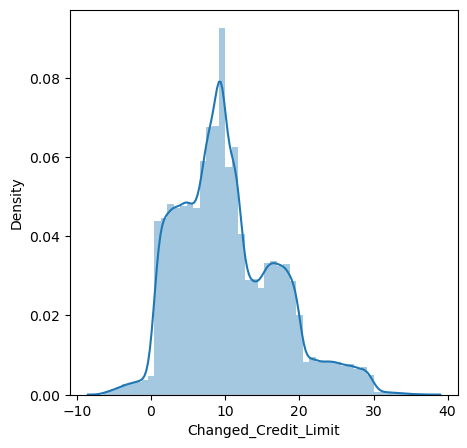

In [102]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Changed_Credit_Limit'])
plt.show()

In [103]:
check_outliers('Changed_Credit_Limit',show1)

True

In [104]:
handle_outliers('Changed_Credit_Limit',show1)

In [105]:
check_outliers('Changed_Credit_Limit',show1)

False

In [106]:
check_Negative('Changed_Credit_Limit',show1)


True

In [107]:
change_Negative('Changed_Credit_Limit',show1)

In [108]:
check_Negative('Changed_Credit_Limit',show1)

False

# 16.Credit_Mix

In [109]:
show1['Credit_Mix'] = show1['Credit_Mix'].str.replace('-','Excellent')
show1['Credit_Mix'] = show1['Credit_Mix'].str.replace('_','Excellent')

In [110]:
show1['Credit_Mix']=show1['Credit_Mix'].str.strip()

<AxesSubplot:xlabel='Credit_Mix', ylabel='count'>

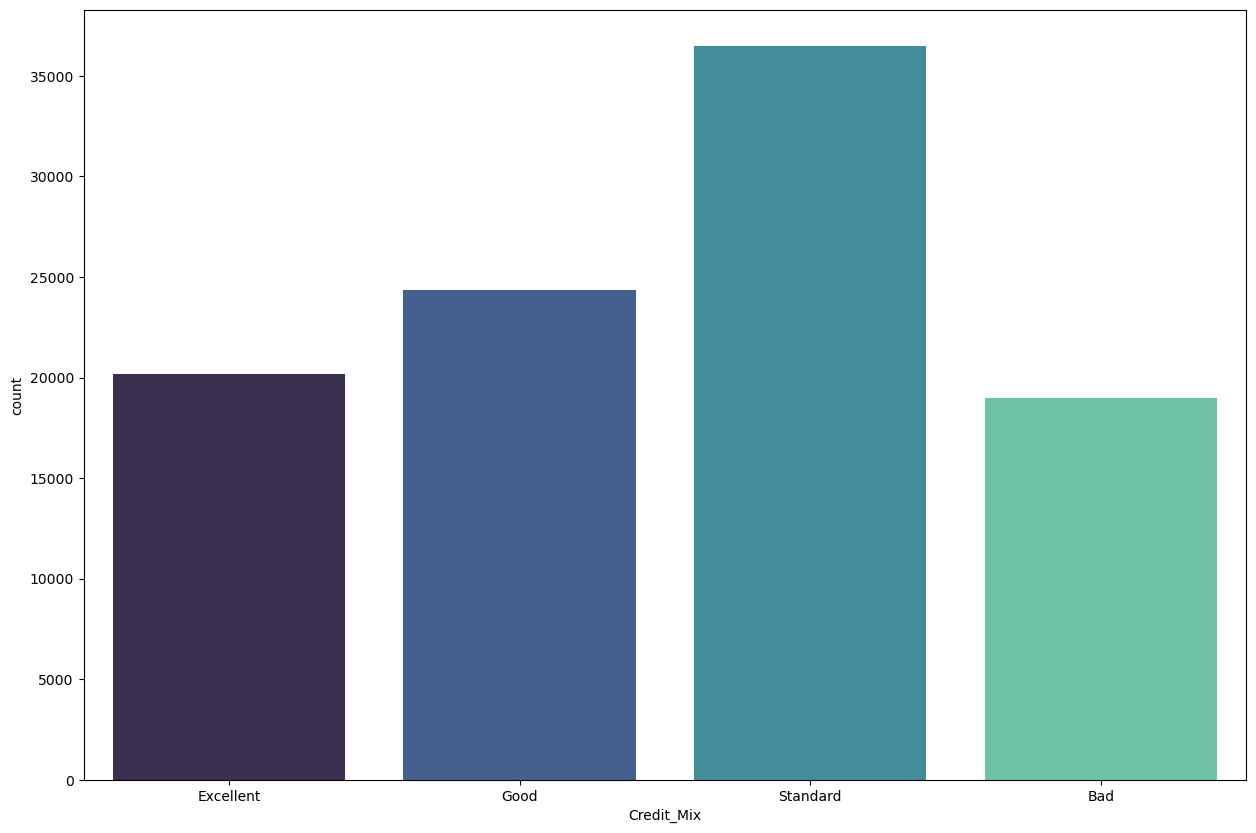

In [111]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Credit_Mix' ,data=show1,palette="mako")

<AxesSubplot:xlabel='Credit_Mix', ylabel='Count'>

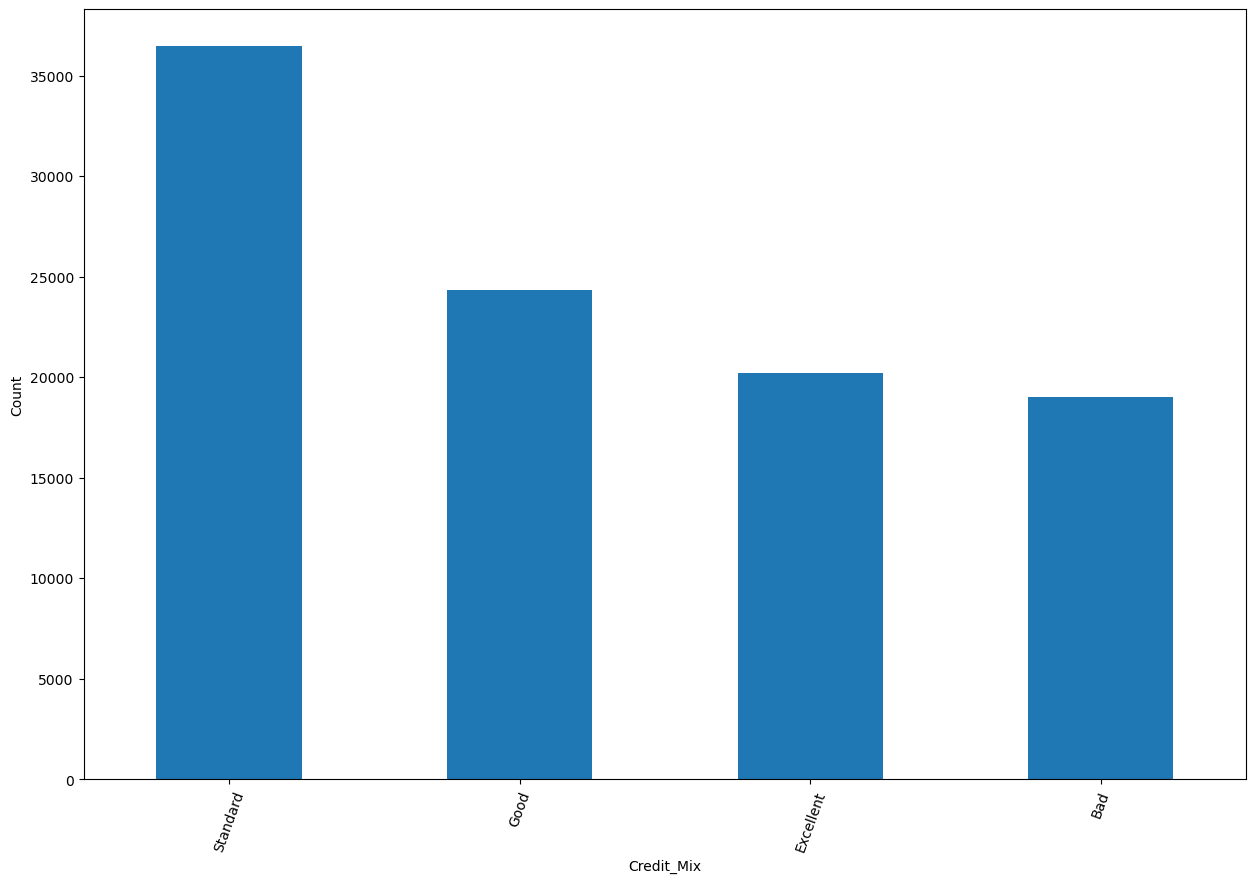

In [112]:
plt.figure(figsize = (15,10))
show1['Credit_Mix'].value_counts().plot(kind='bar', xlabel='Credit_Mix', ylabel='Count', rot=70)

# 17.Outstanding_Debt

In [113]:
show1['Outstanding_Debt'] = show1['Outstanding_Debt'].str.replace('-','')
show1['Outstanding_Debt'] = show1['Outstanding_Debt'].str.replace('_','')
show1['Outstanding_Debt'] = show1['Outstanding_Debt'].astype(float)

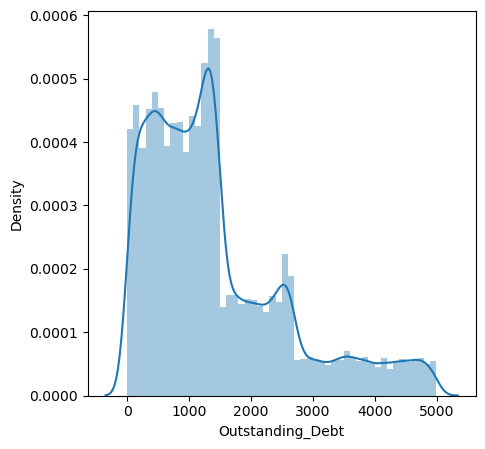

In [114]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Outstanding_Debt'])
plt.show()

In [115]:
check_outliers('Outstanding_Debt',show1)

True

In [116]:
handle_outliers('Outstanding_Debt',show1)

In [117]:
check_outliers('Outstanding_Debt',show1)

False

In [118]:
check_Negative('Outstanding_Debt',show1)


False

# 18.Credit_History_Age

In [119]:
show1['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [120]:
show1['Credit_History_Age']=show1['Credit_History_Age'].str.strip()

In [121]:
mode=show1['Credit_History_Age'].mode()[0]
show1['Credit_History_Age'].fillna(mode,inplace=True)

In [122]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [123]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,float64,"[23.0, 67.5, 28.0, 34.0, 54.0, 55.0, 21.0, 31....",44,0
2,Occupation,object,"[Scientist, Data Scientist, Teacher, Engineer,...",16,0
3,Annual_Income,float64,"[19114.12, 34847.84, 143162.64, 30689.89, 3554...",12264,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, 3093.745000000001, 3037.9...",12559,0
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 13, 11]",13,0
6,Num_Credit_Card,float64,"[4.0, 11.5, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0,...",13,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 38, 15, 7, 12, 20, 1, 14, 32, ...",35,0
8,Num_of_Loan,int32,"[4, 1, 3, 12, 0, 2, 7, 5, 6, 8, 9]",11,0
9,Delay_from_due_date,int64,"[3, 0, 5, 6, 8, 7, 13, 10, 4, 9, 1, 12, 11, 30...",56,0


In [124]:
# Split string column into two new columns
show1[['Credit_History_Years', 'Credit_History_Months']] = show1.Credit_History_Age.str.split(" and ", expand = True)

In [125]:
show1.drop(['Credit_History_Age'],axis=1,inplace=True)

In [126]:
show1.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,3,7.0,11.27,4.0,Excellent,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,22 Years,1 Months
1,February,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,0,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,15 Years,11 Months
2,March,67.5,Scientist,19114.12,3093.745000,3,4.0,3,4,3,7.0,9.40,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,22 Years,3 Months
3,April,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,22 Years,4 Months
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,22 Years,5 Months


<AxesSubplot:xlabel='Credit_History_Years', ylabel='count'>

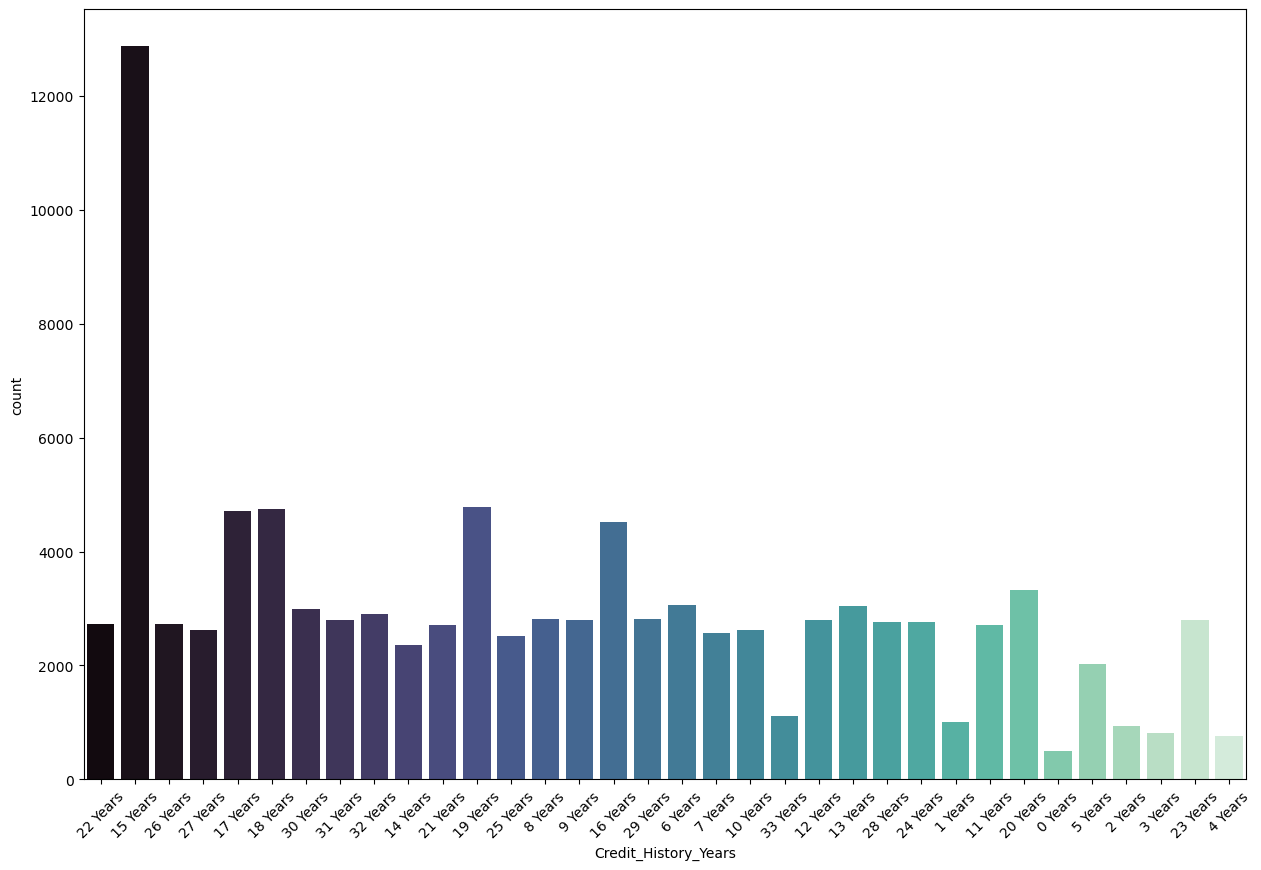

In [127]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
sns.countplot(x= 'Credit_History_Years' ,data=show1,palette="mako")

<AxesSubplot:xlabel='Credit_History_Months', ylabel='count'>

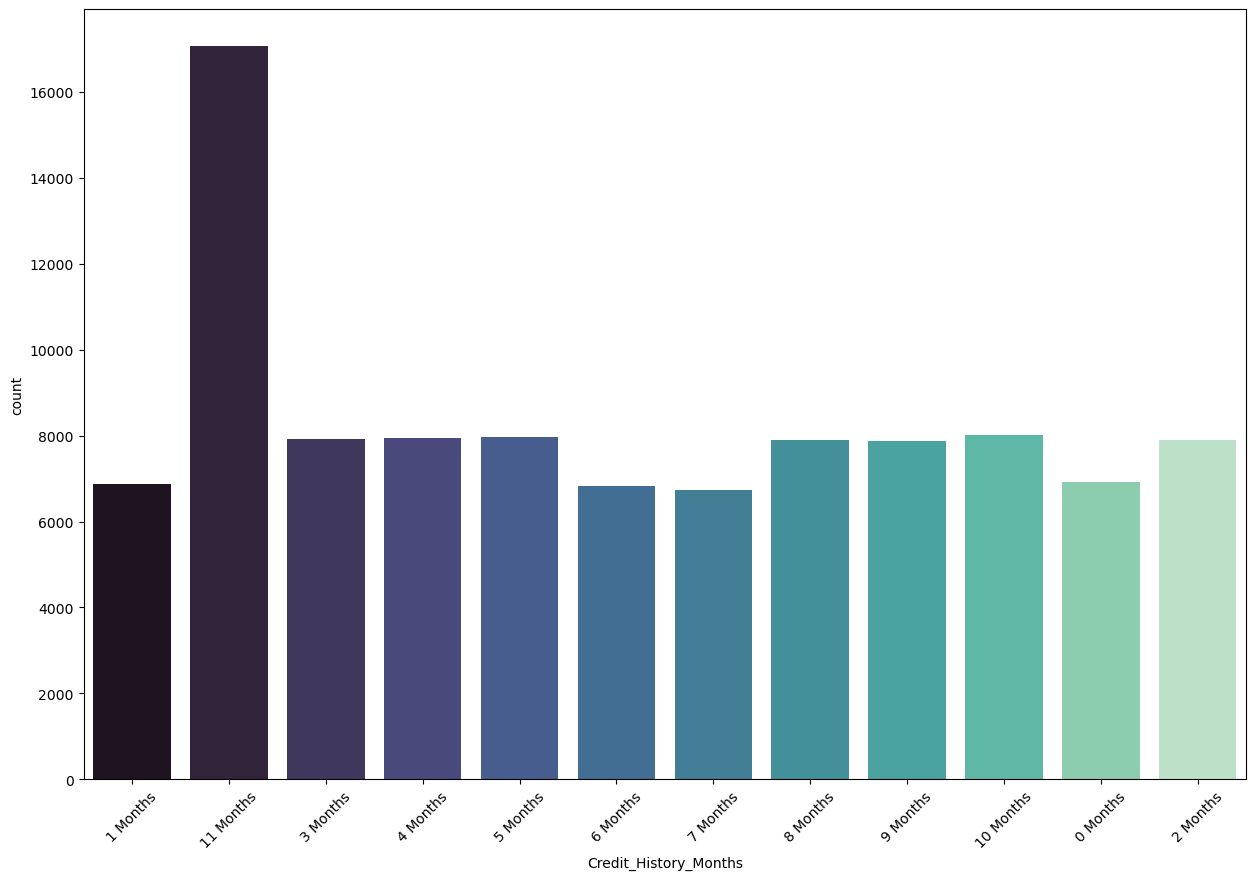

In [128]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
sns.countplot(x= 'Credit_History_Months' ,data=show1,palette="mako")

# 19.Payment_of_Min_Amount

In [129]:
show1['Payment_of_Min_Amount']=show1['Payment_of_Min_Amount'].str.strip()

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='count'>

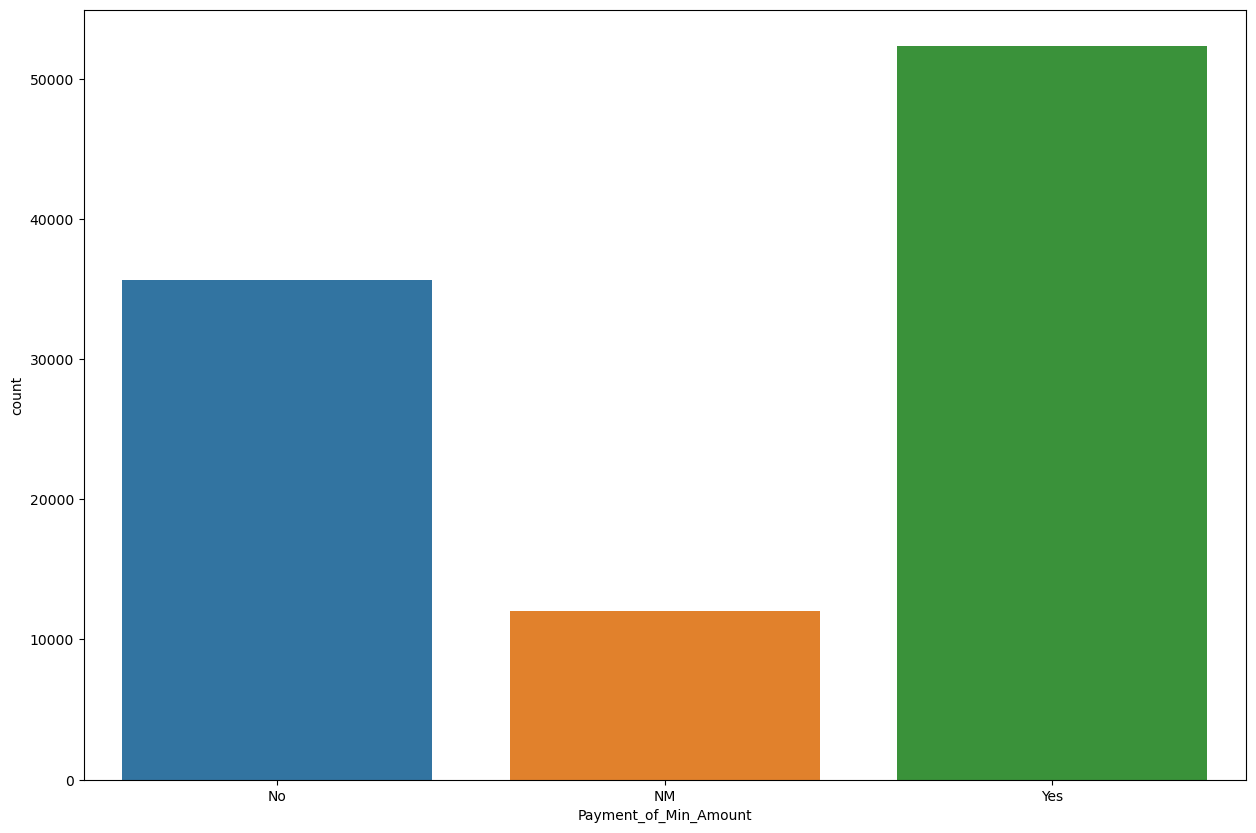

In [130]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Payment_of_Min_Amount' ,data=show1)

<AxesSubplot:xlabel='Payment_of_Min_Amount', ylabel='Count'>

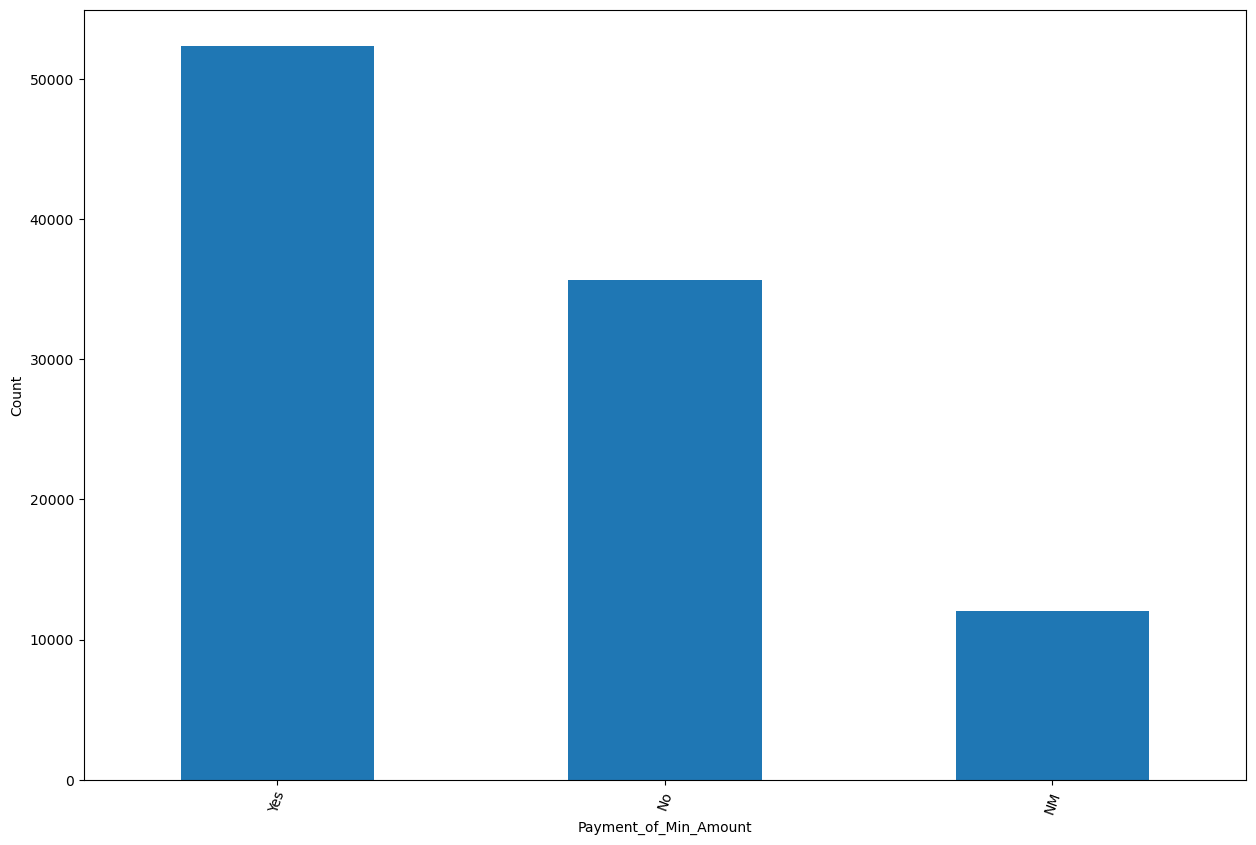

In [131]:
plt.figure(figsize = (15,10))
show1['Payment_of_Min_Amount'].value_counts().plot(kind='bar', xlabel='Payment_of_Min_Amount', ylabel='Count', rot=70)

# 20.Amount_invested_monthly

In [132]:
show1['Amount_invested_monthly'] = show1['Amount_invested_monthly'].str.replace('-','')
show1['Amount_invested_monthly'] = show1['Amount_invested_monthly'].str.replace('_','')
show1['Amount_invested_monthly'] = show1['Amount_invested_monthly'].astype(float)

In [133]:
median=show1['Amount_invested_monthly'].median()
show1['Amount_invested_monthly'].fillna(median,inplace=True)

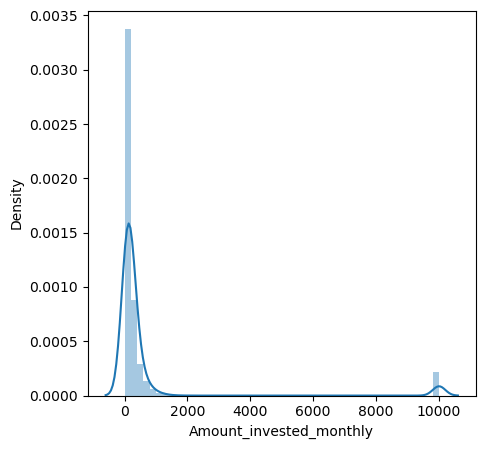

In [134]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Amount_invested_monthly'])
plt.show()

In [135]:
check_outliers('Amount_invested_monthly',show1)

True

In [136]:
handle_outliers('Amount_invested_monthly',show1)

In [137]:
check_outliers('Amount_invested_monthly',show1)

False

In [138]:
check_Negative('Amount_invested_monthly',show1)


False

# 21.Payment_Behaviour

In [139]:
show1['Payment_Behaviour']=show1['Payment_Behaviour'].str.strip()

In [140]:
show1.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,3,7.0,11.27,4.0,Excellent,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,22 Years,1 Months
1,February,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,0,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,15 Years,11 Months
2,March,67.5,Scientist,19114.12,3093.745000,3,4.0,3,4,3,7.0,9.40,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,22 Years,3 Months
3,April,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,22 Years,4 Months
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,22 Years,5 Months


In [141]:
show1['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [142]:
show1['Payment_Behaviour'] = show1['Payment_Behaviour'].str.replace('!@9#%8','Medium_spent_Medium_value_payments')

In [143]:
show1['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments        25513
High_spent_Medium_value_payments      17540
Low_spent_Medium_value_payments       13861
High_spent_Large_value_payments       13721
High_spent_Small_value_payments       11340
Low_spent_Large_value_payments        10425
Medium_spent_Medium_value_payments     7600
Name: Payment_Behaviour, dtype: int64

In [144]:
# Split string column into two new columns
show1[['P_Be1', 'P_Be2','P_Be3','P_Be4','P_Be5']] = show1.Payment_Behaviour.str.split("_", expand = True)

In [145]:
show1.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months,P_Be1,P_Be2,P_Be3,P_Be4,P_Be5
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,3,7.0,11.27,4.0,Excellent,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,22 Years,1 Months,High,spent,Small,value,payments
1,February,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,0,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,15 Years,11 Months,Low,spent,Large,value,payments
2,March,67.5,Scientist,19114.12,3093.745000,3,4.0,3,4,3,7.0,9.40,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,22 Years,3 Months,Low,spent,Medium,value,payments
3,April,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,22 Years,4 Months,Low,spent,Small,value,payments
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,22 Years,5 Months,High,spent,Medium,value,payments


In [146]:
show1["expenditure size"] = show1['P_Be1'].astype(str) +"_"+ show1["P_Be2"].astype(str)

In [147]:
show1["Payments volume"] = show1['P_Be3'].astype(str) +"_"+ show1["P_Be4"].astype(str) +"_"+ show1["P_Be5"].astype(str)

In [148]:
show1.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months,P_Be1,P_Be2,P_Be3,P_Be4,P_Be5,expenditure size,Payments volume
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,3,7.0,11.27,4.0,Excellent,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.49408867943663,Good,22 Years,1 Months,High,spent,Small,value,payments,High_spent,Small_value_payments
1,February,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,0,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.62916249607184,Good,15 Years,11 Months,Low,spent,Large,value,payments,Low_spent,Large_value_payments
2,March,67.5,Scientist,19114.12,3093.745000,3,4.0,3,4,3,7.0,9.40,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.2098628537912,Good,22 Years,3 Months,Low,spent,Medium,value,payments,Low_spent,Medium_value_payments
3,April,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45130972736786,Good,22 Years,4 Months,Low,spent,Small,value,payments,Low_spent,Small_value_payments
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.48923103222177,Good,22 Years,5 Months,High,spent,Medium,value,payments,High_spent,Medium_value_payments


In [149]:
show1.drop(['Payment_Behaviour','P_Be1','P_Be2','P_Be3','P_Be4','P_Be5'],axis=1,inplace=True)

In [150]:
show1.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months,expenditure size,Payments volume
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,3,7.0,11.27,4.0,Excellent,809.98,26.822620,No,49.574949,80.415295,312.49408867943663,Good,22 Years,1 Months,High_spent,Small_value_payments
1,February,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,0,14.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,284.62916249607184,Good,15 Years,11 Months,Low_spent,Large_value_payments
2,March,67.5,Scientist,19114.12,3093.745000,3,4.0,3,4,3,7.0,9.40,4.0,Good,809.98,28.609352,No,49.574949,81.699521,331.2098628537912,Good,22 Years,3 Months,Low_spent,Medium_value_payments
3,April,23.0,Scientist,19114.12,3093.745000,3,4.0,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,223.45130972736786,Good,22 Years,4 Months,Low_spent,Small_value_payments
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,3,4,6,14.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,341.48923103222177,Good,22 Years,5 Months,High_spent,Medium_value_payments


<AxesSubplot:xlabel='expenditure size', ylabel='count'>

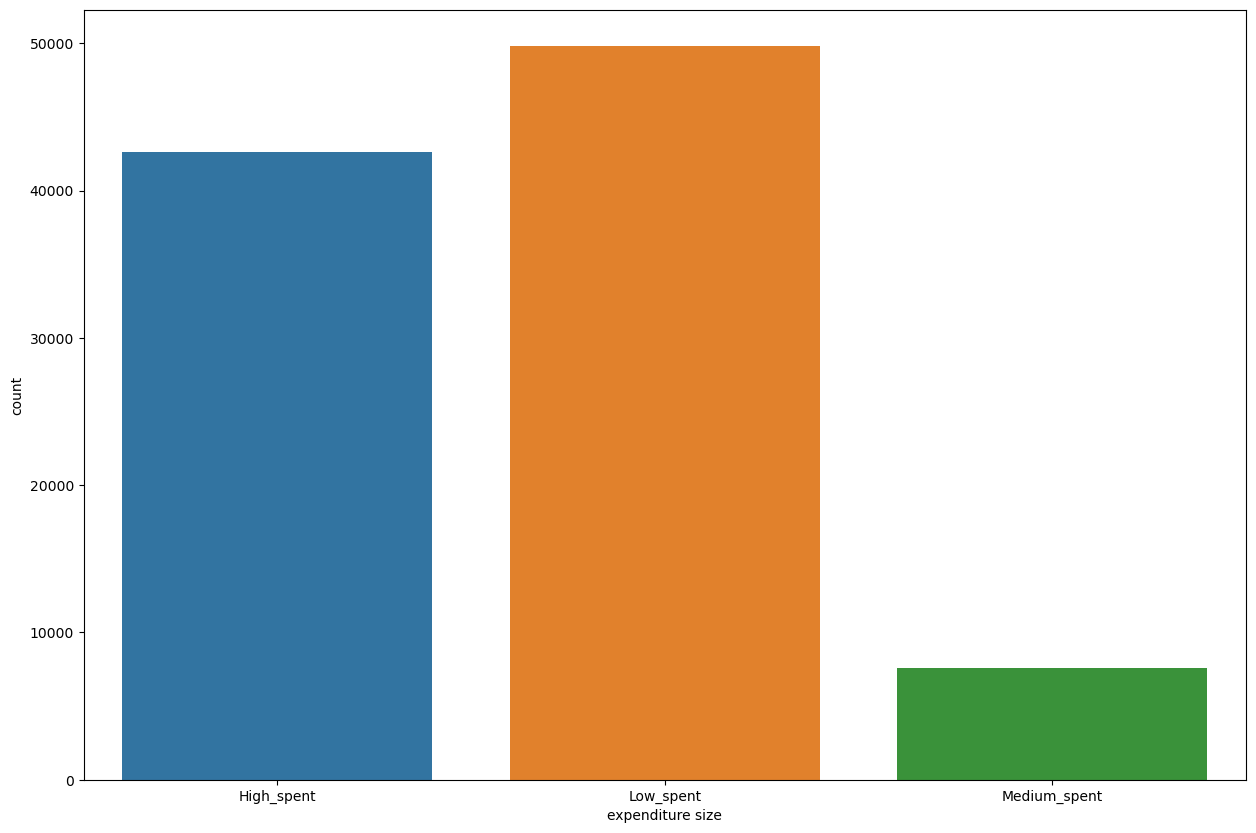

In [151]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'expenditure size' ,data=show1)

<AxesSubplot:xlabel='expenditure size', ylabel='Count'>

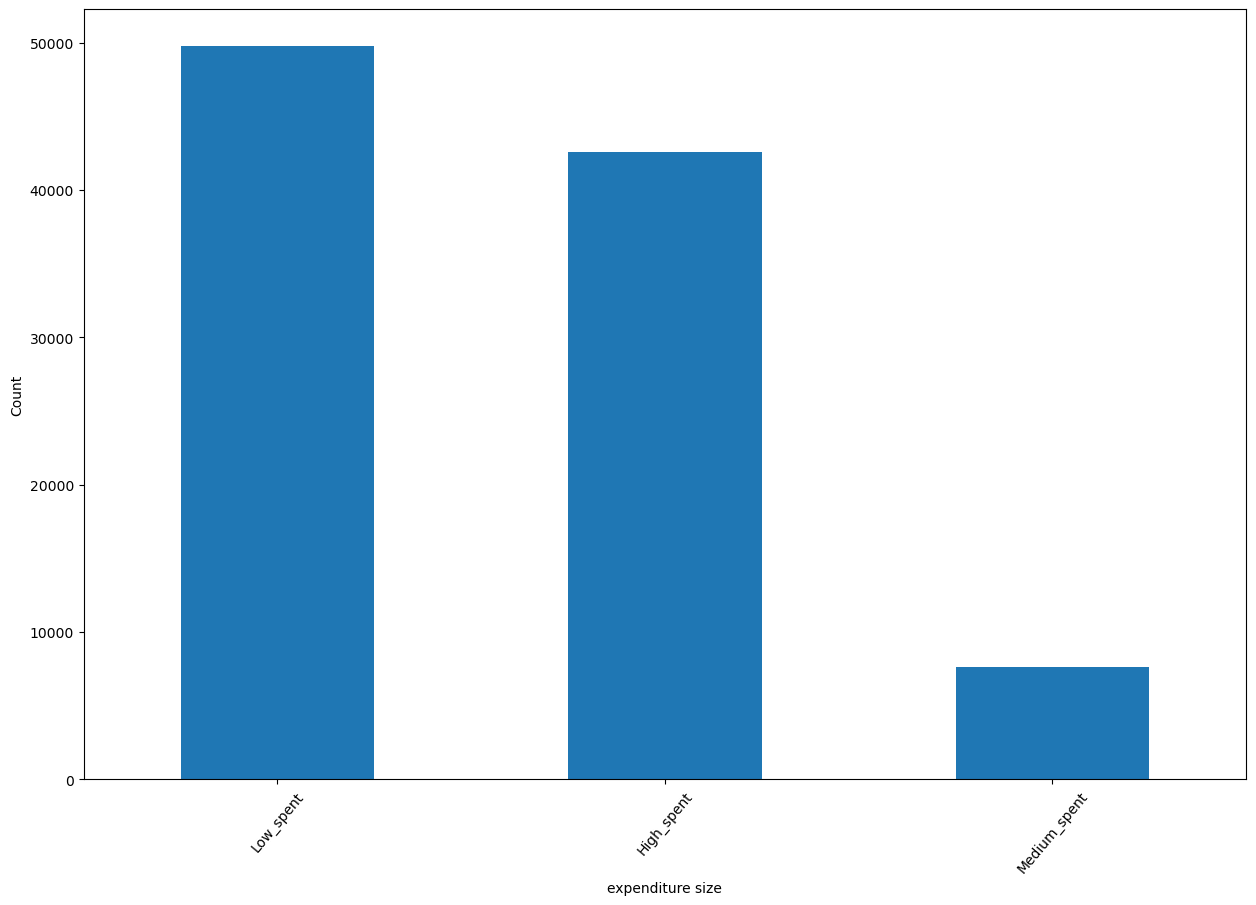

In [152]:
plt.figure(figsize = (15,10))
show1['expenditure size'].value_counts().plot(kind='bar', xlabel='expenditure size', ylabel='Count', rot=50)

<AxesSubplot:xlabel='Payments volume', ylabel='count'>

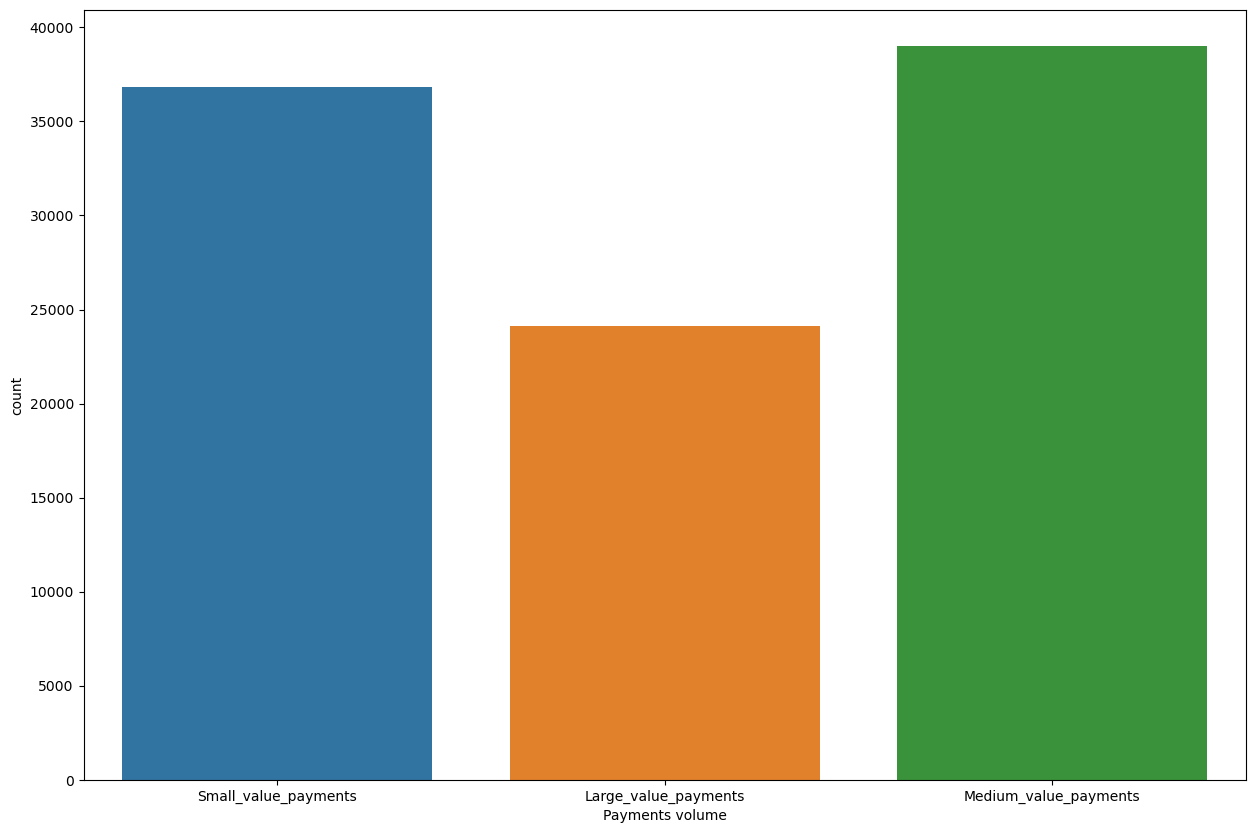

In [153]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Payments volume' ,data=show1)

<AxesSubplot:xlabel='Payments volume', ylabel='Count'>

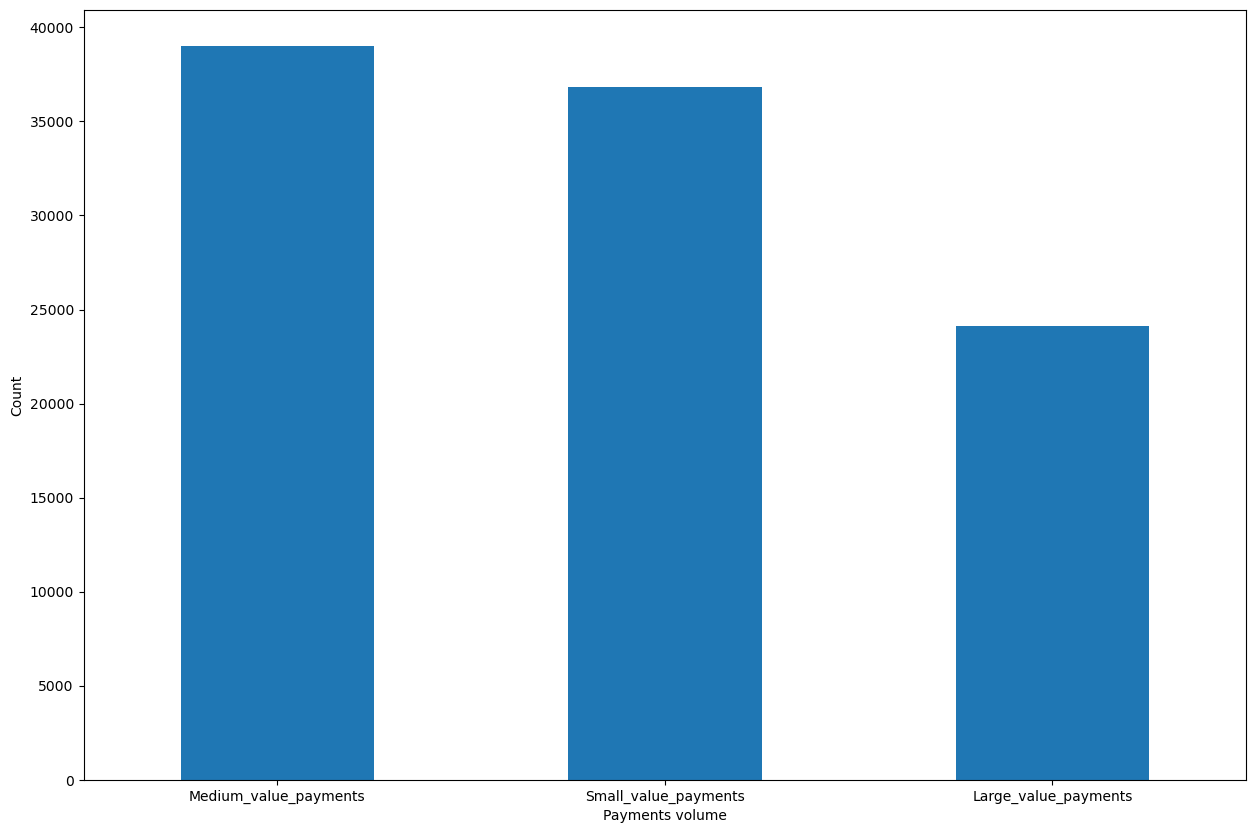

In [154]:
plt.figure(figsize = (15,10))
show1['Payments volume'].value_counts().plot(kind='bar', xlabel='Payments volume', ylabel='Count', rot=0)

# 22.Monthly_Balance

In [155]:
show1['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [156]:
show1['Monthly_Balance'] = show1['Monthly_Balance'].str.replace('-','')
show1['Monthly_Balance'] = show1['Monthly_Balance'].str.replace('_','')
show1['Monthly_Balance'] = show1['Monthly_Balance'].str.replace('__','')
show1['Monthly_Balance'] = show1['Monthly_Balance'].astype(float)

In [157]:
mean=show1['Monthly_Balance'].mean()
show1['Monthly_Balance'].fillna(mean,inplace=True)

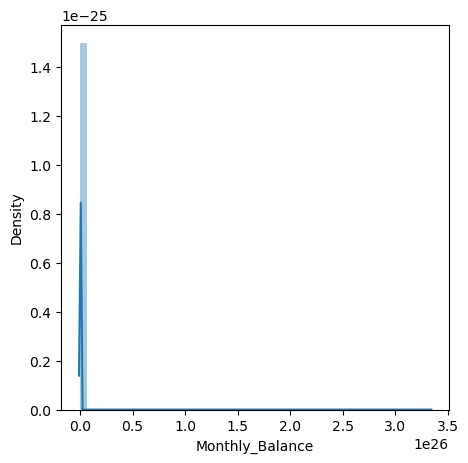

In [158]:
plt.figure(figsize = (5,5))
sns.distplot(show1['Monthly_Balance'])
plt.show()

In [159]:
check_outliers('Monthly_Balance',show1)

True

In [160]:
handle_outliers('Monthly_Balance',show1)

In [161]:
check_outliers('Monthly_Balance',show1)

False

In [162]:
check_Negative('Monthly_Balance',show1)


False

# 23.Credit_Score

In [163]:
show1['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [164]:
show1['Credit_Score']=show1['Credit_Score'].str.strip()

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

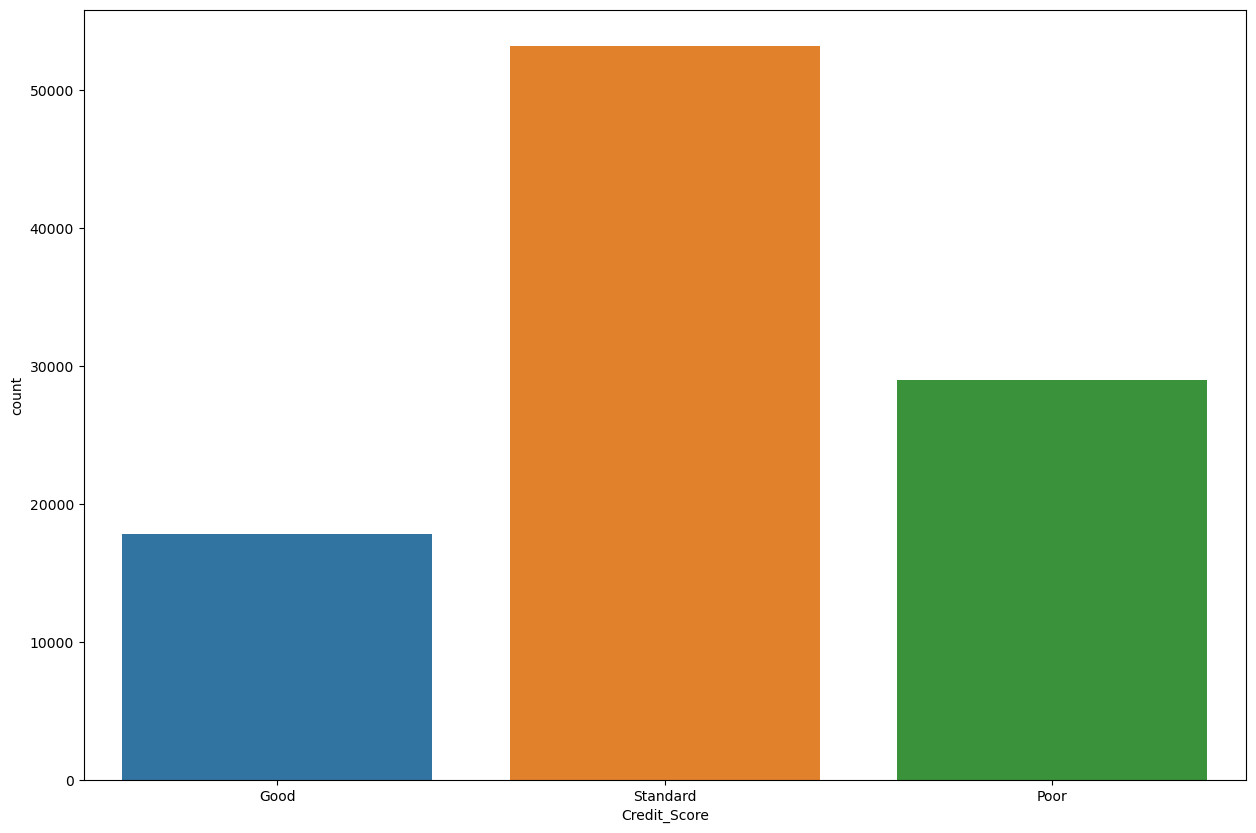

In [165]:
plt.figure(figsize = (15,10))
sns.countplot(x= 'Credit_Score' ,data=show1)

<AxesSubplot:xlabel='Credit_Score', ylabel='Count'>

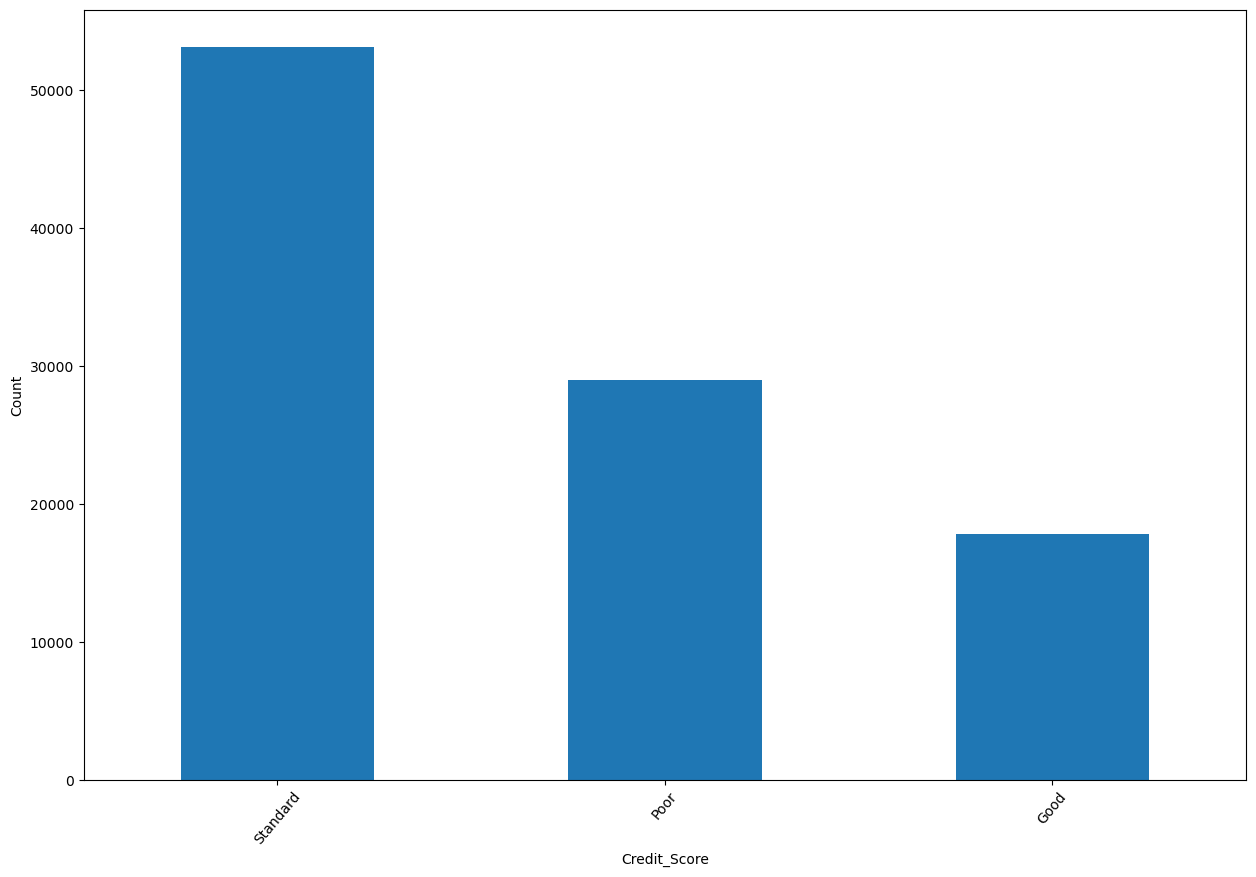

In [166]:
plt.figure(figsize = (15,10))
show1['Credit_Score'].value_counts().plot(kind='bar', xlabel='Credit_Score', ylabel='Count', rot=50)

In [167]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,object,"[January, February, March, April, May, June, J...",8,0
1,Age,float64,"[23.0, 67.5, 28.0, 34.0, 54.0, 55.0, 21.0, 31....",44,0
2,Occupation,object,"[Scientist, Data Scientist, Teacher, Engineer,...",16,0
3,Annual_Income,float64,"[19114.12, 34847.84, 143162.64, 30689.89, 3554...",12264,0
4,Monthly_Inhand_Salary,float64,"[1824.8433333333328, 3093.745000000001, 3037.9...",12559,0
5,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 13, 11]",13,0
6,Num_Credit_Card,float64,"[4.0, 11.5, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0,...",13,0
7,Interest_Rate,int64,"[3, 6, 8, 4, 5, 38, 15, 7, 12, 20, 1, 14, 32, ...",35,0
8,Num_of_Loan,int32,"[4, 1, 3, 12, 0, 2, 7, 5, 6, 8, 9]",11,0
9,Delay_from_due_date,int64,"[3, 0, 5, 6, 8, 7, 13, 10, 4, 9, 1, 12, 11, 30...",56,0


In [168]:
show1['Payments volume'].value_counts()

Medium_value_payments    39001
Small_value_payments     36853
Large_value_payments     24146
Name: Payments volume, dtype: int64

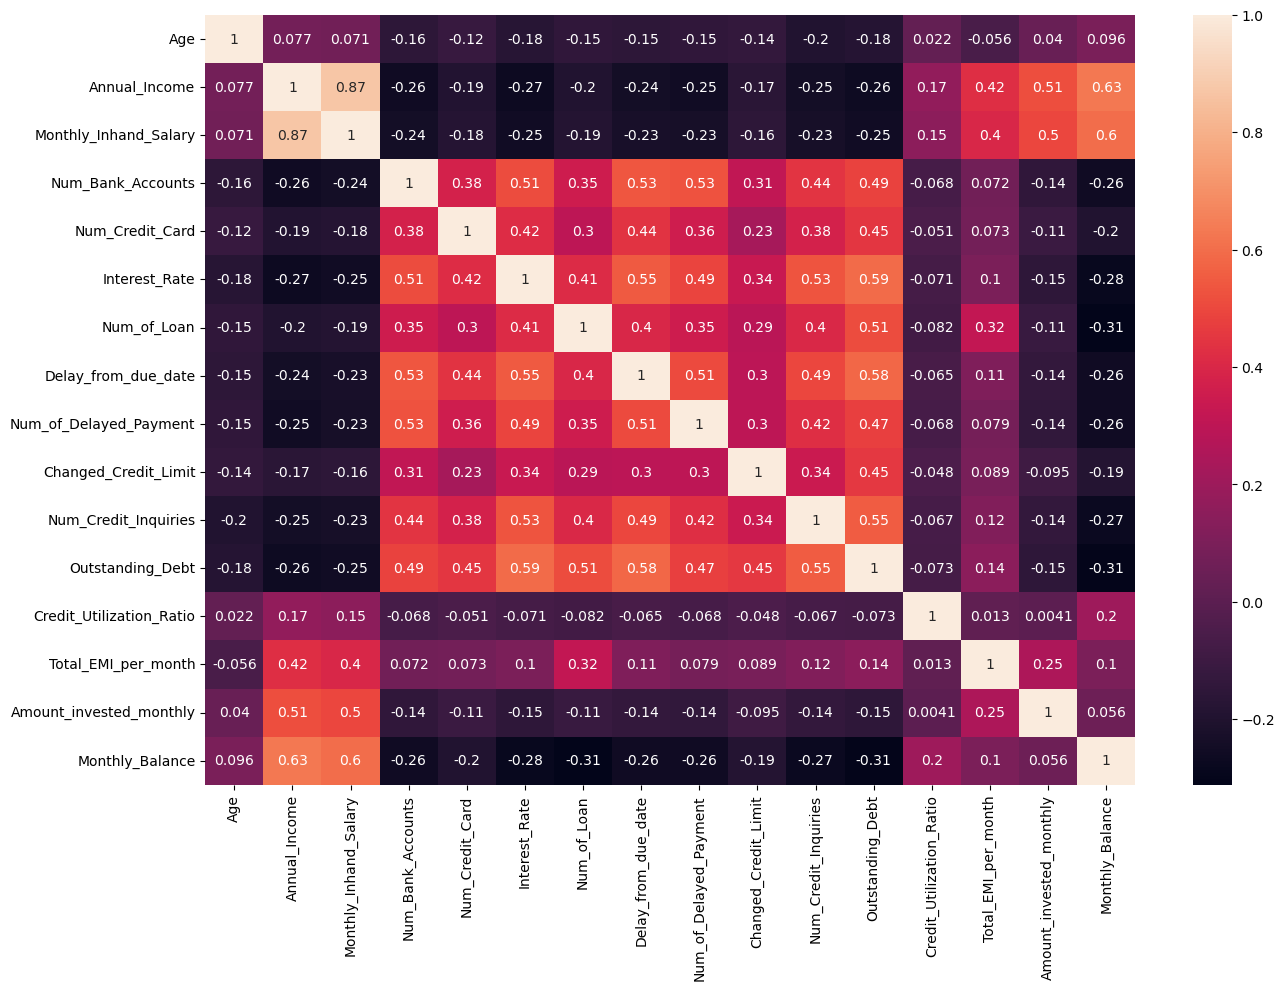

In [169]:
plt.figure(figsize = (15,10))
sns.heatmap(show1.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Annual_Income'>

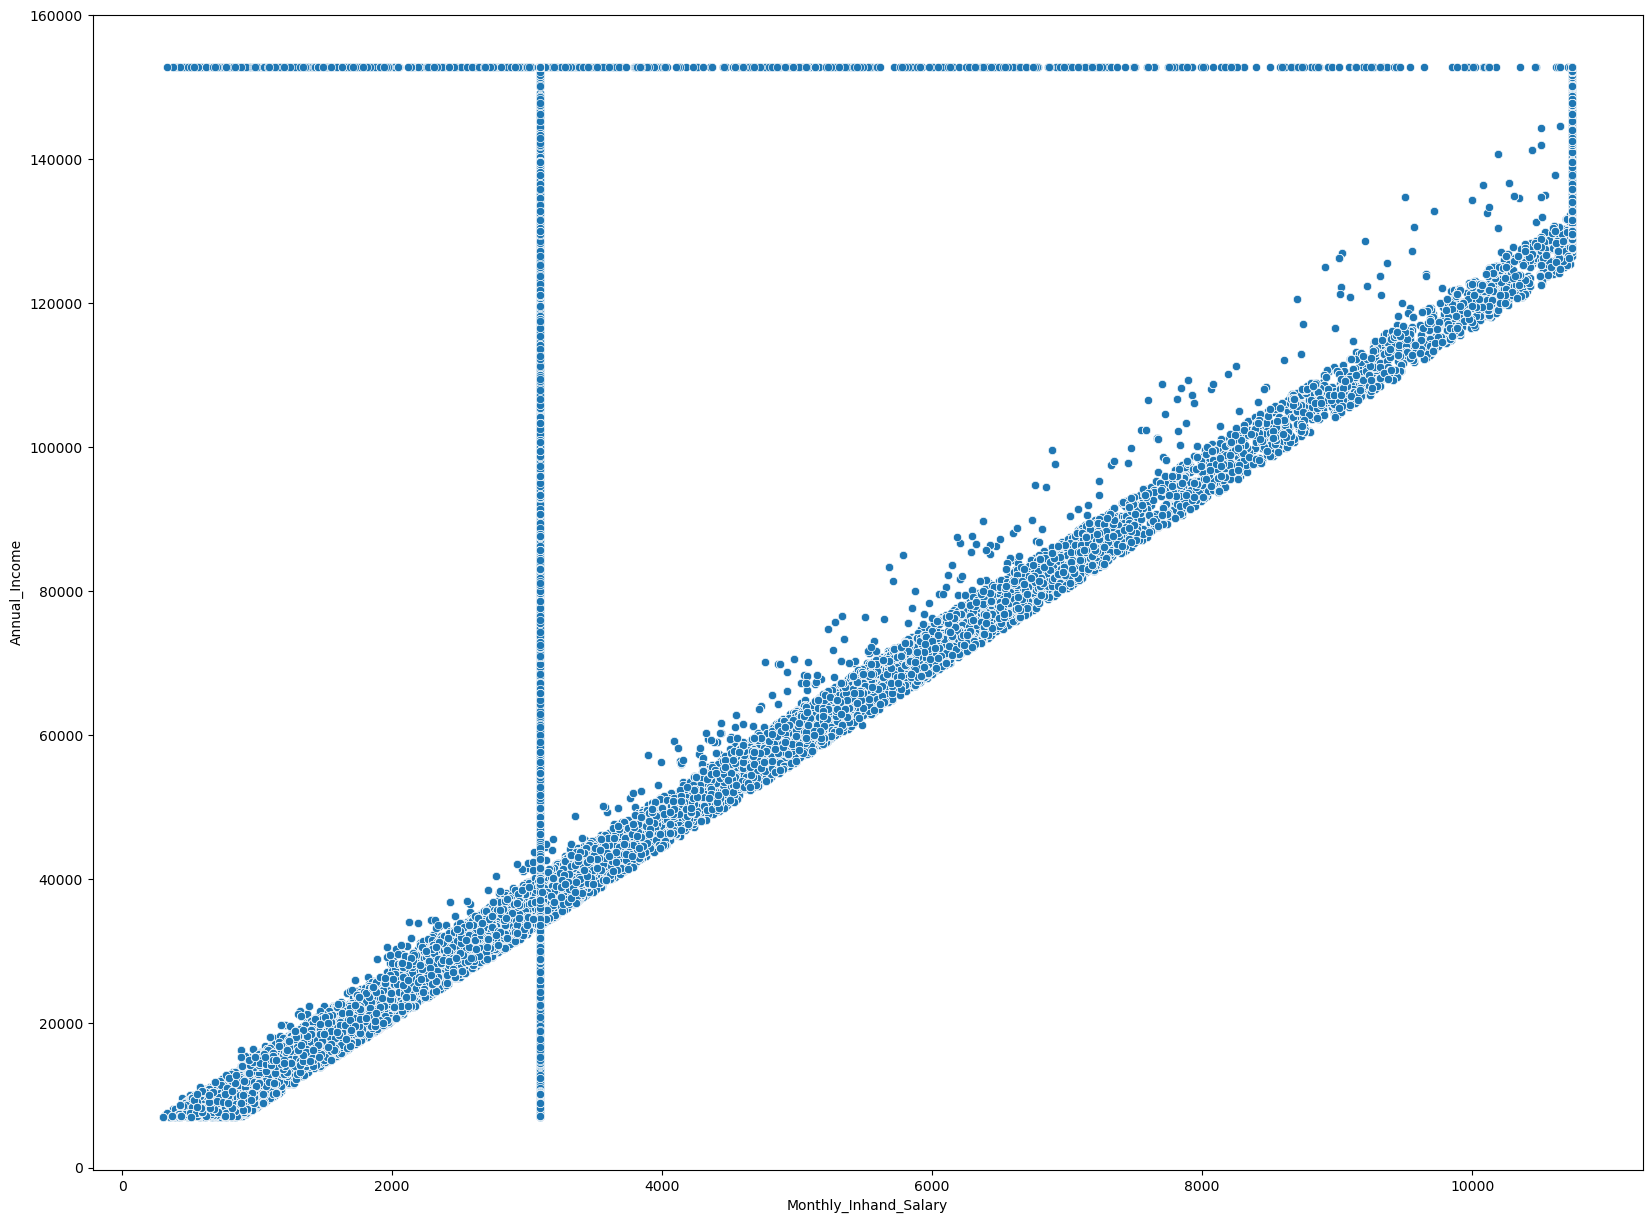

In [170]:
plt.figure(figsize = (20,15))
sns.scatterplot(data=show1, x="Monthly_Inhand_Salary", y="Annual_Income")

<AxesSubplot:xlabel='Annual_Income', ylabel='Amount_invested_monthly'>

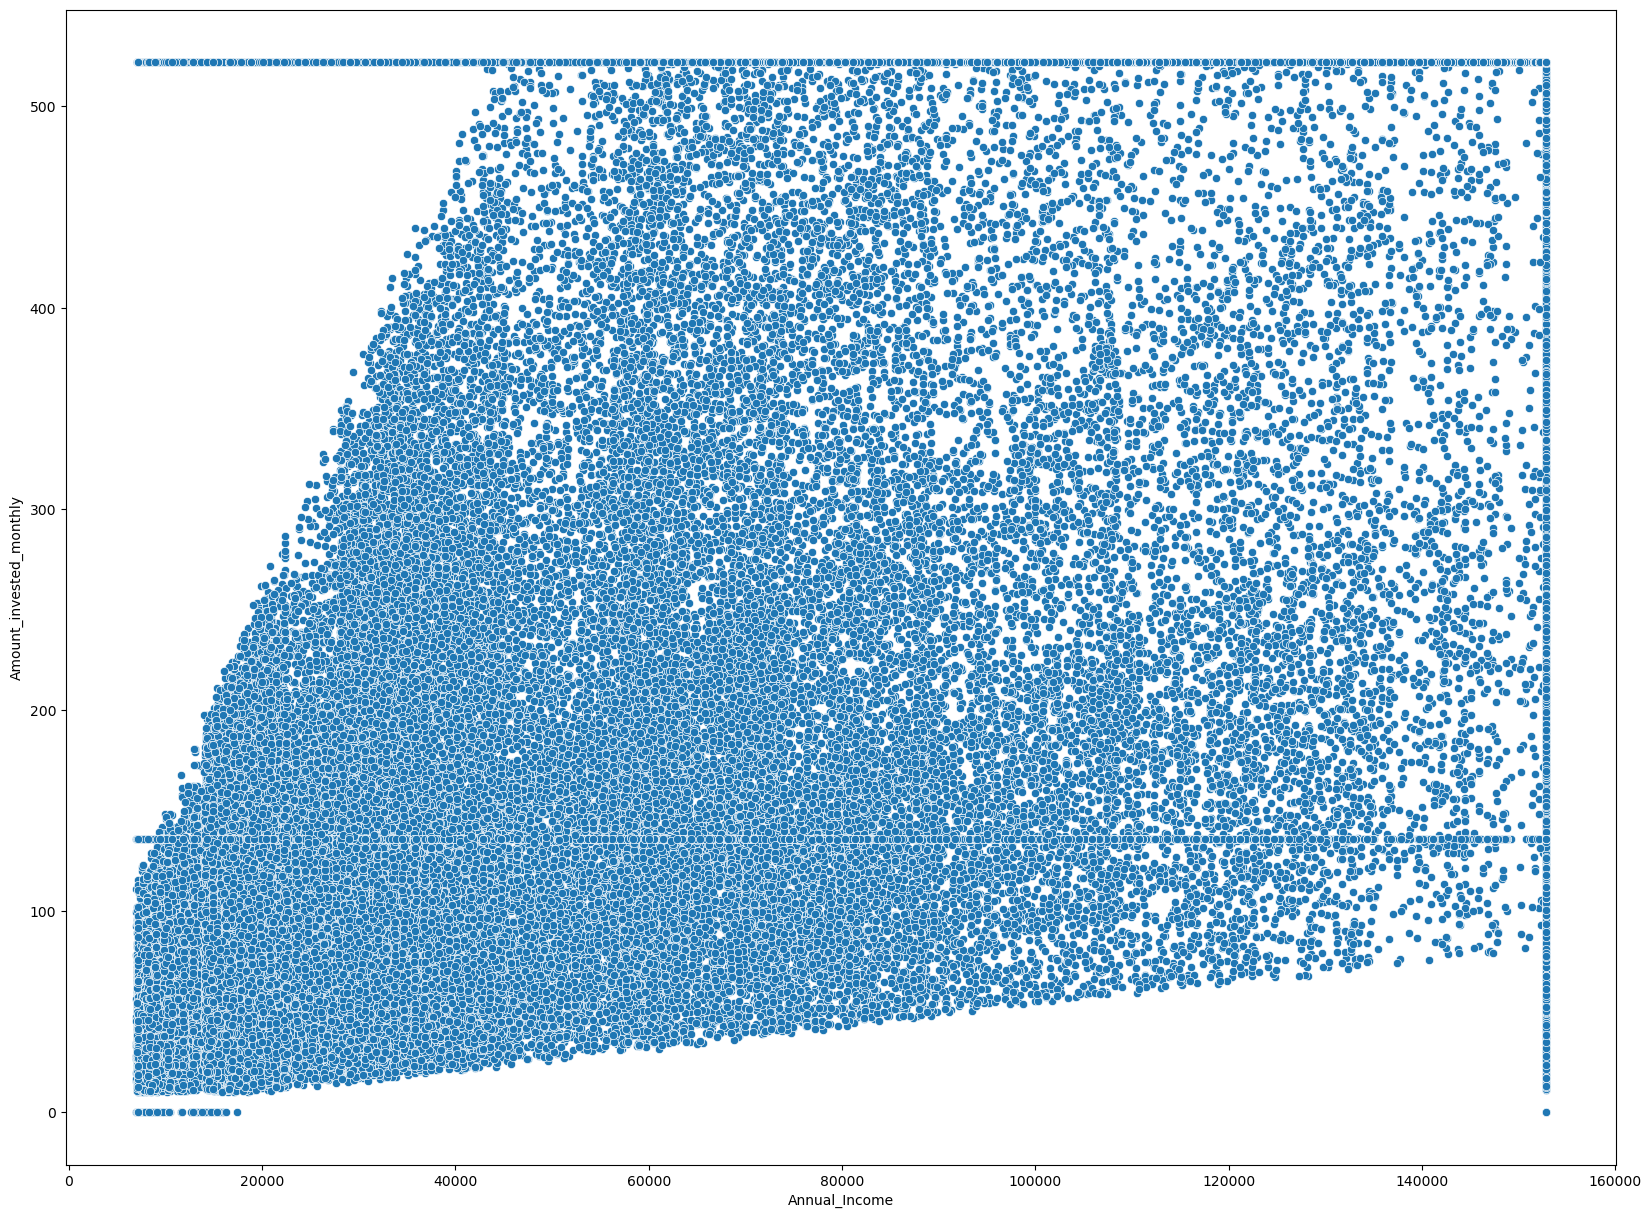

In [171]:
plt.figure(figsize = (20,15))
sns.scatterplot(data=show1, x="Annual_Income", y="Amount_invested_monthly")

([<matplotlib.patches.Wedge at 0x291db4b15e0>,
 [Text(1.073039015440777, 0.24204807650937524, 'Mechanic'),
  Text(0.8755068956743676, 0.6659487034499221, 'Architect'),
  Text(0.5411277524820658, 0.9576955442590868, 'Data Scientist'),
  Text(0.12640793103603384, 1.0927126955294284, 'Journalist'),
  Text(-0.30632608332342526, 1.0564867867965648, 'Media_Manager'),
  Text(-0.689733953431792, 0.8568938519346201, 'Accountant'),
  Text(-0.9661762119314855, 0.5258360271964307, 'Engineer'),
  Text(-1.0938810230899132, 0.11586331310542086, 'Doctor'),
  Text(-1.0552756979011677, -0.3104725453549857, 'Writer'),
  Text(-0.8572837310538276, -0.6892493050199098, 'Scientist'),
  Text(-0.5316239796166022, -0.963003605547044, 'Musician'),
  Text(-0.13083522011774995, -1.092191441633169, 'Entrepreneur'),
  Text(0.2861583597691359, -1.062126825352904, 'Teacher'),
  Text(0.6586646571122781, -0.880999925920068, 'Lawyer'),
  Text(0.9346209007824592, -0.5800722125913159, 'Developer'),
  Text(1.081253615233894

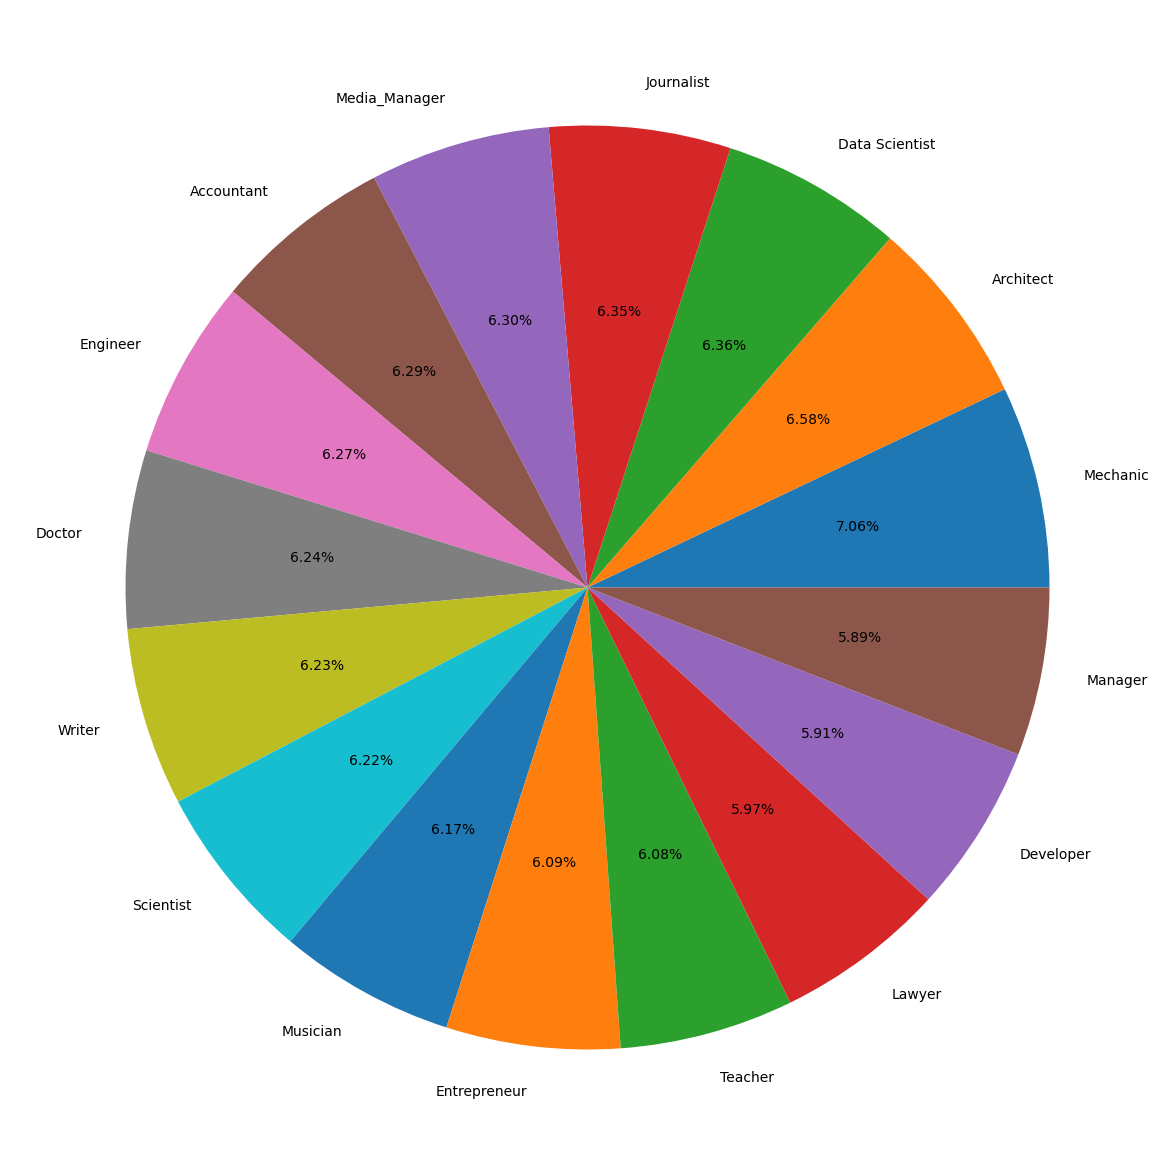

In [172]:
Occupation = show1['Occupation'].value_counts().tolist()
labels = show1['Occupation'].values.tolist()
labels = list(set(labels))
plt.figure(figsize = (15,15))
plt.pie(Occupation, labels = labels, autopct = '%1.2f%%')

<AxesSubplot:xlabel='Occupation', ylabel='Annual_Income'>

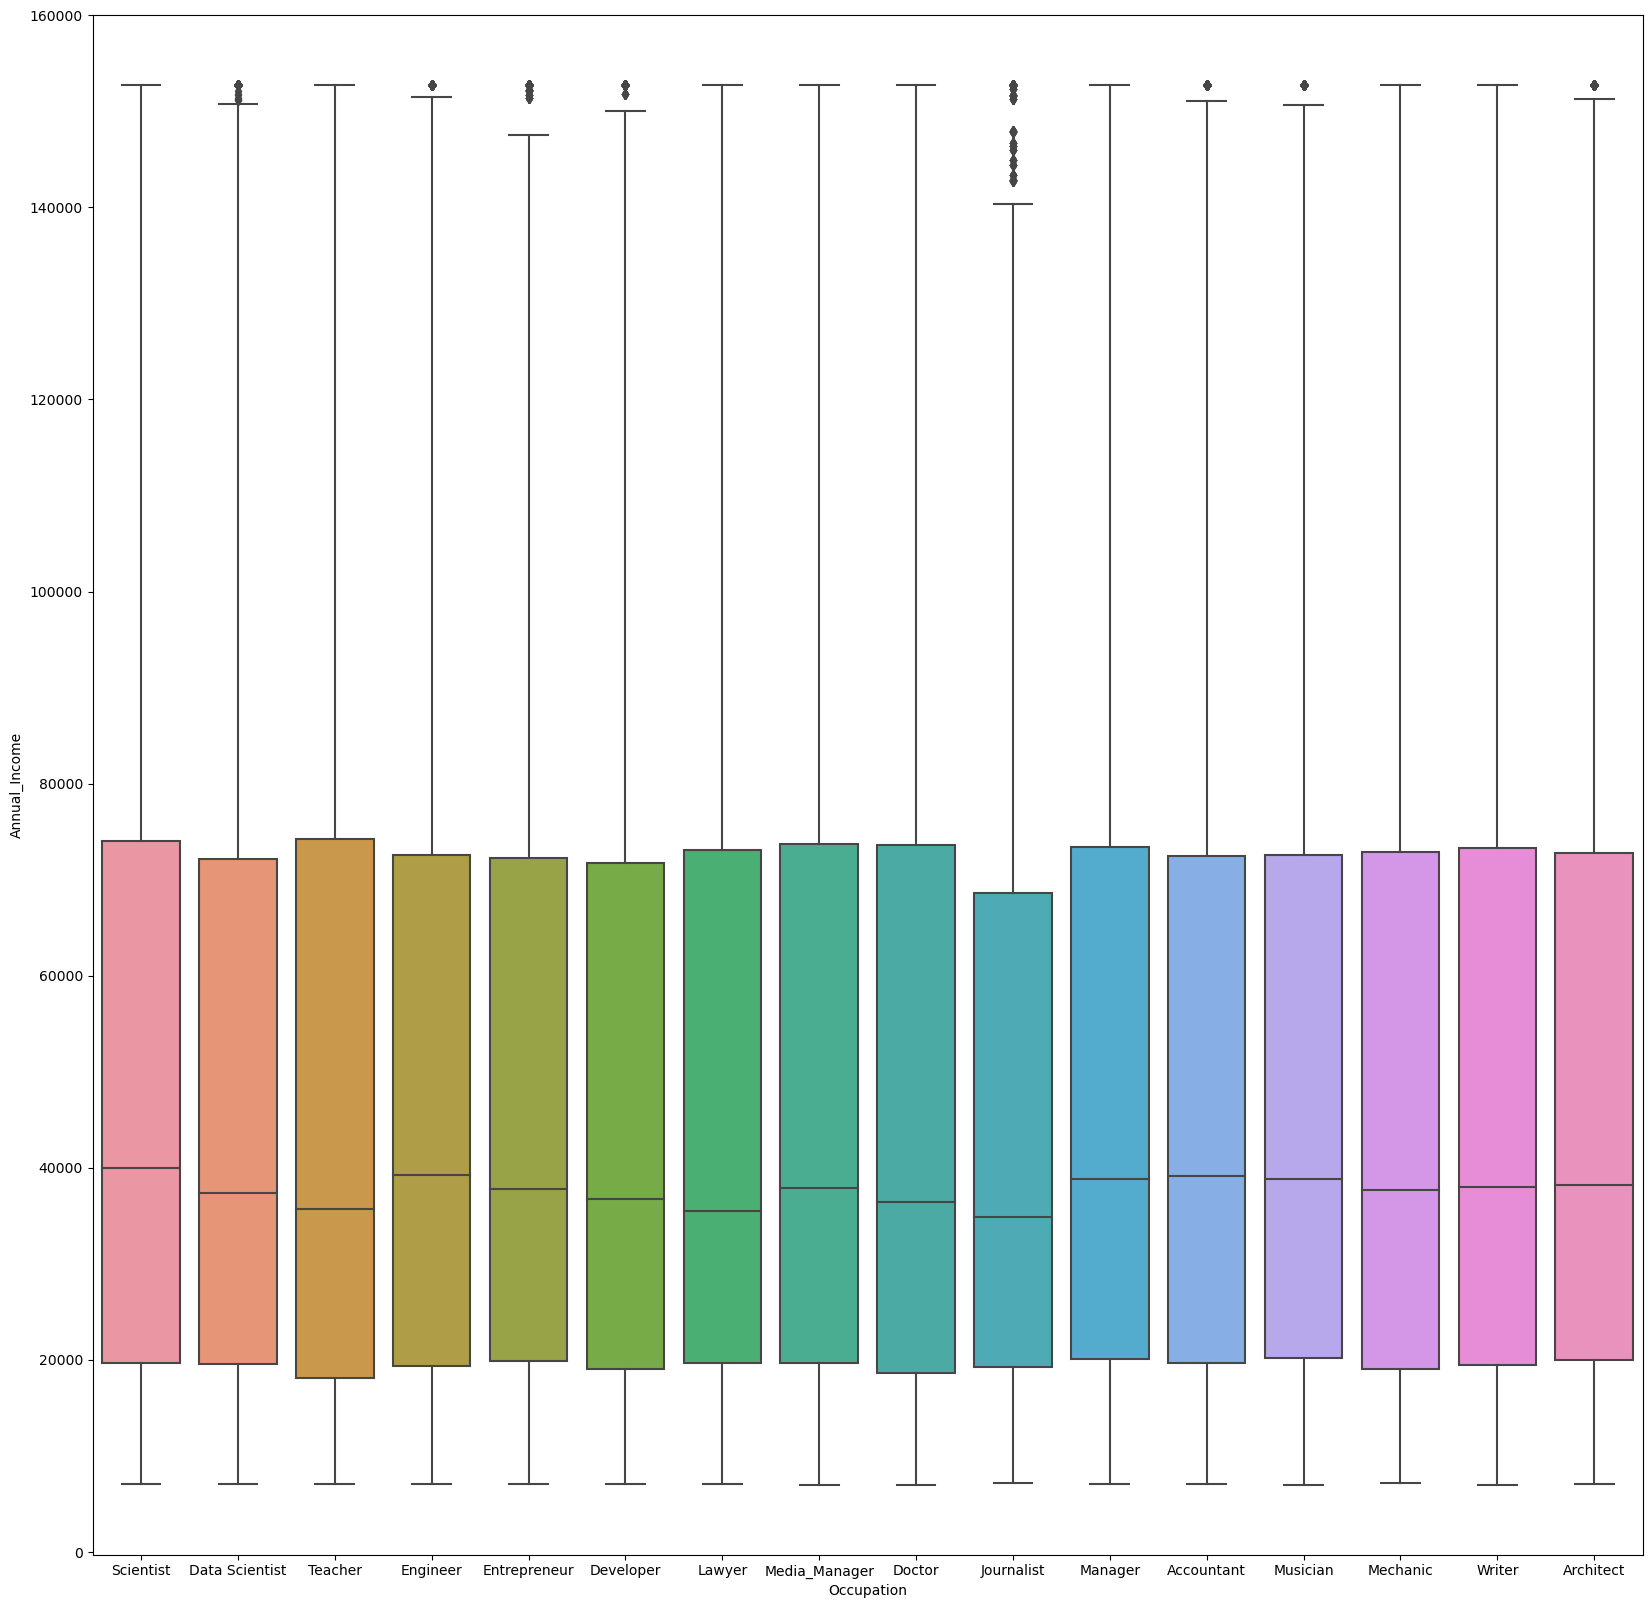

In [173]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = show1, x = 'Occupation', y = 'Annual_Income')

<AxesSubplot:xlabel='Credit_Score', ylabel='Annual_Income'>

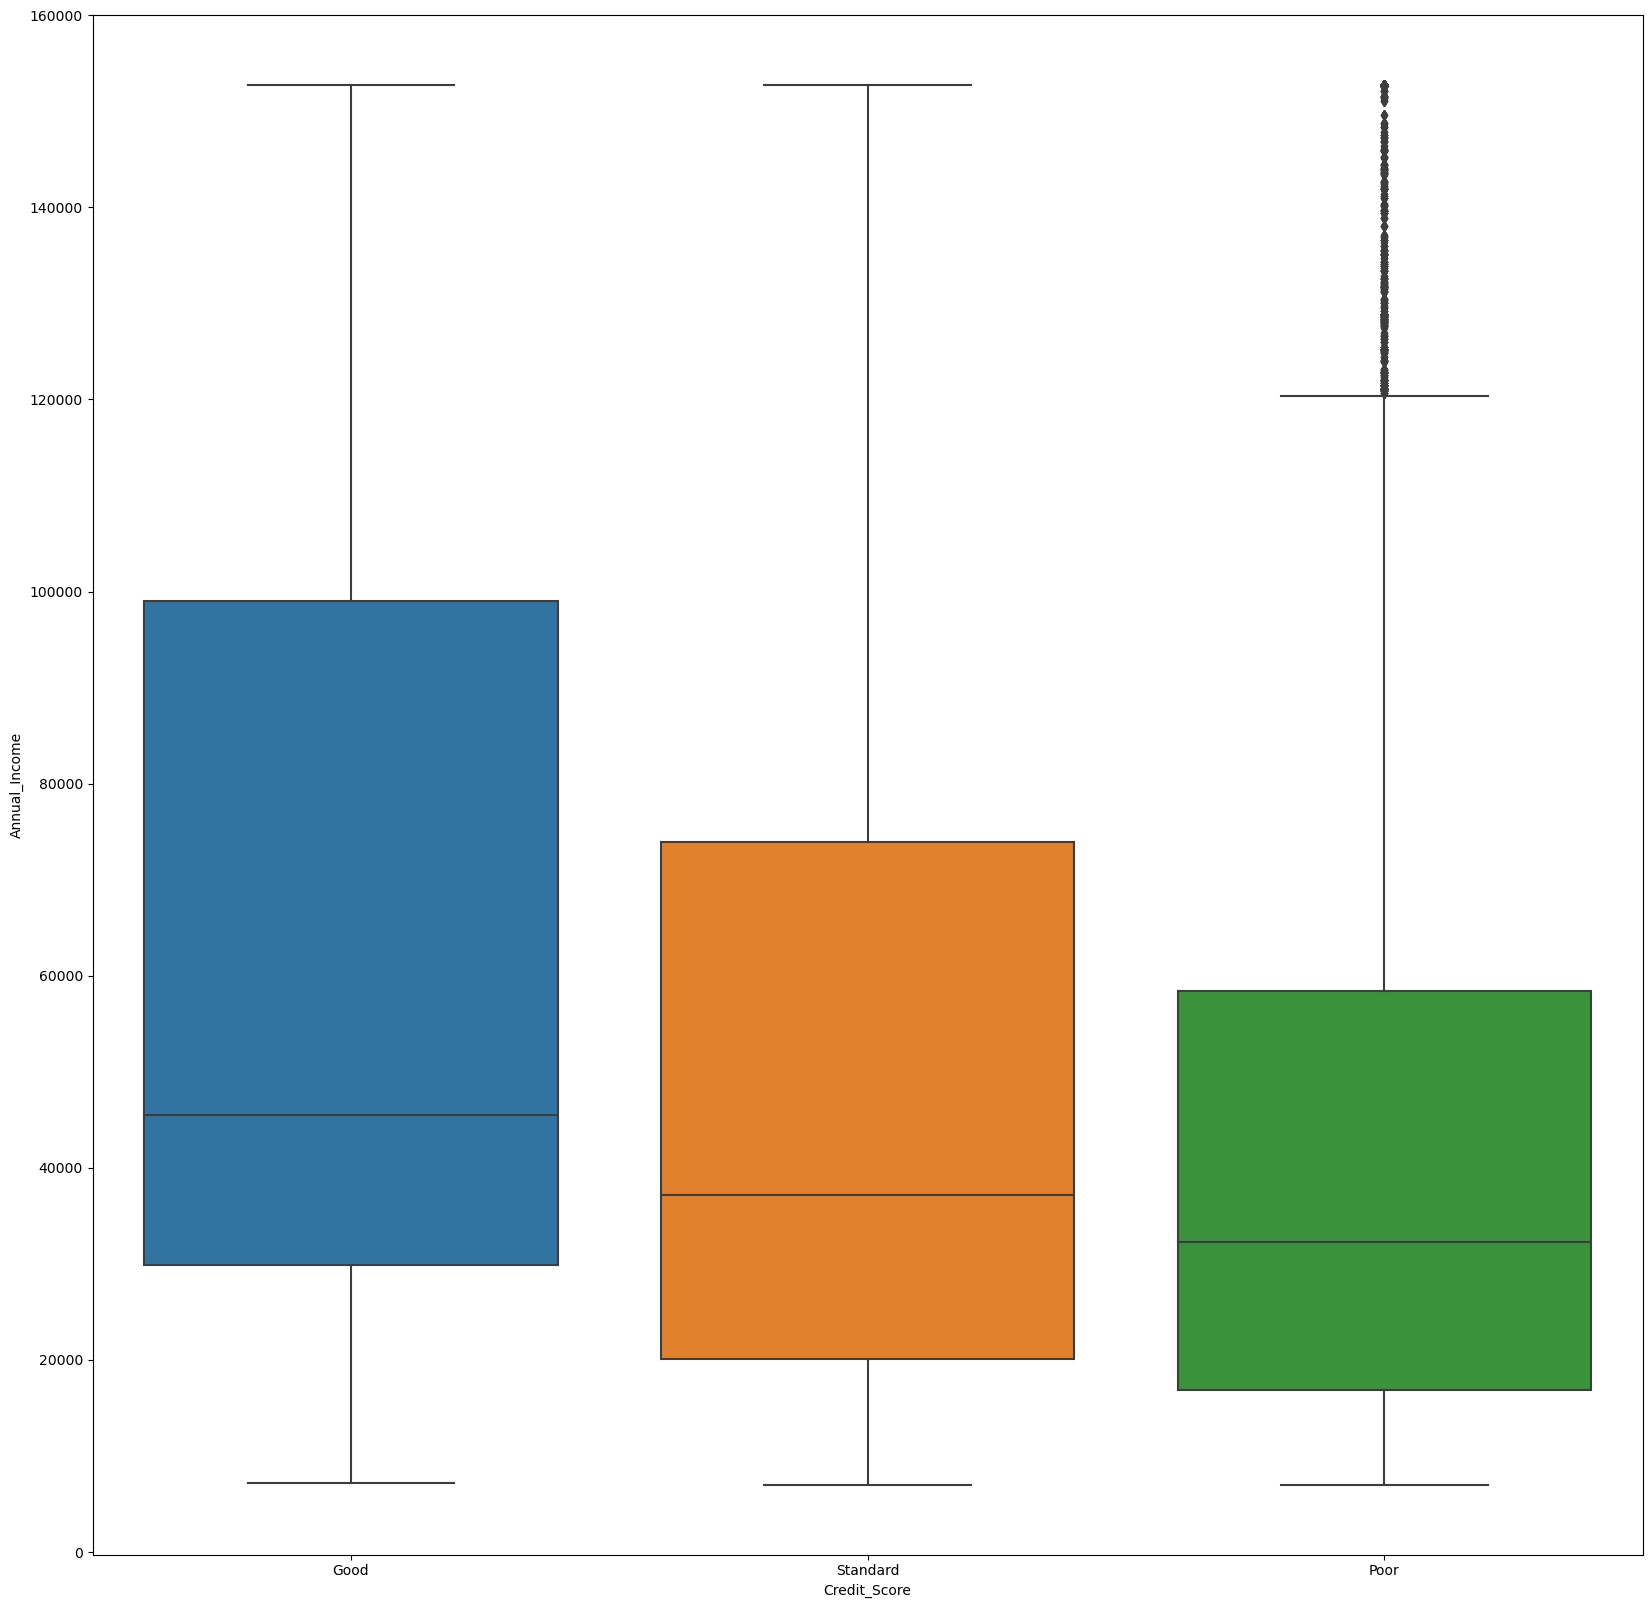

In [174]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = show1, x = 'Credit_Score', y = 'Annual_Income')

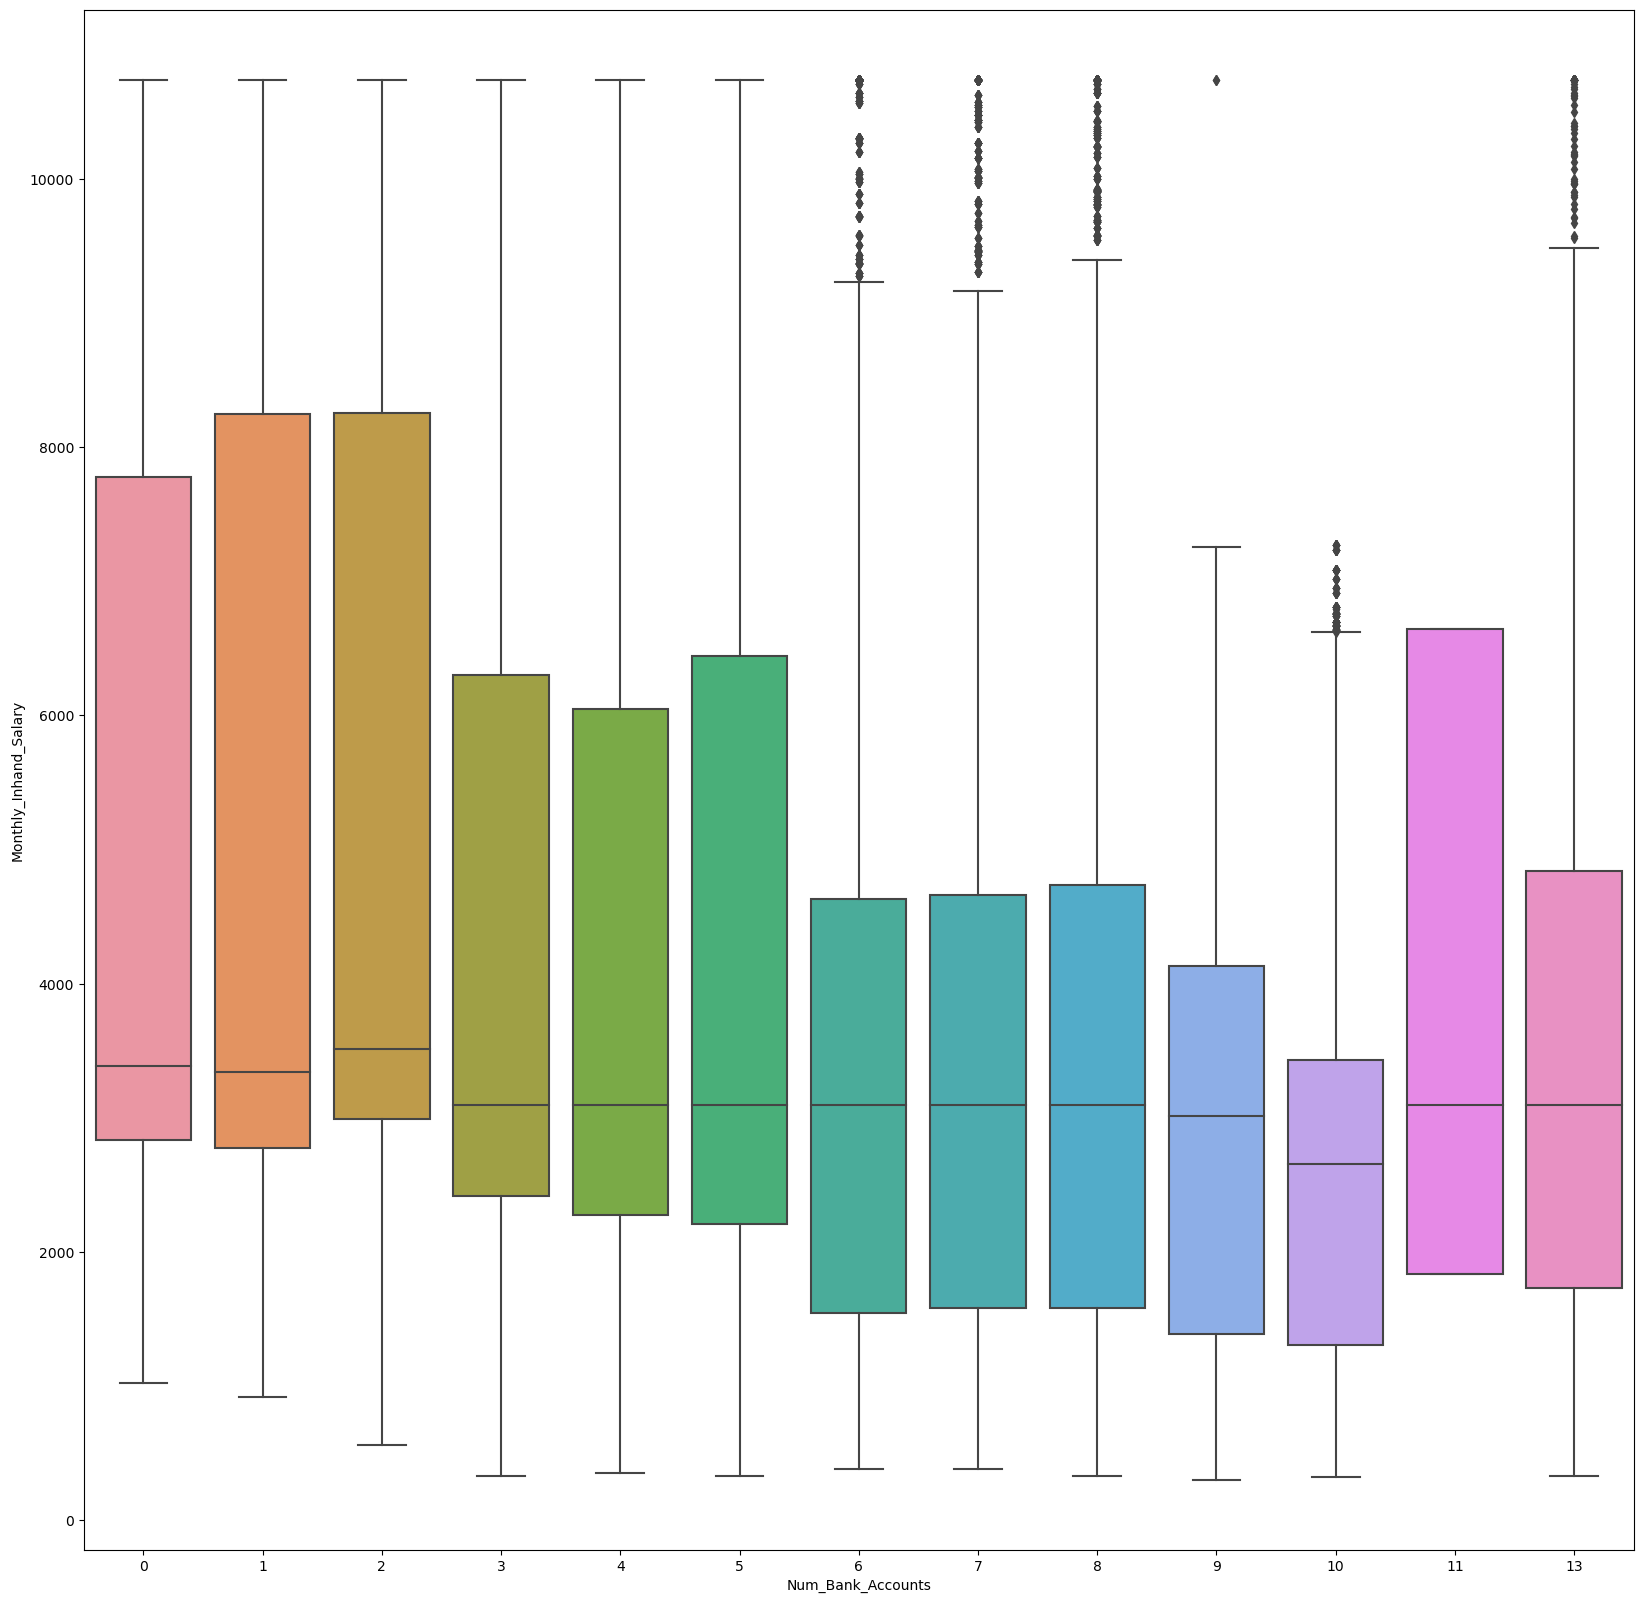

In [175]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = show1, x = 'Num_Bank_Accounts', y = 'Monthly_Inhand_Salary')
plt.show()

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='count'>

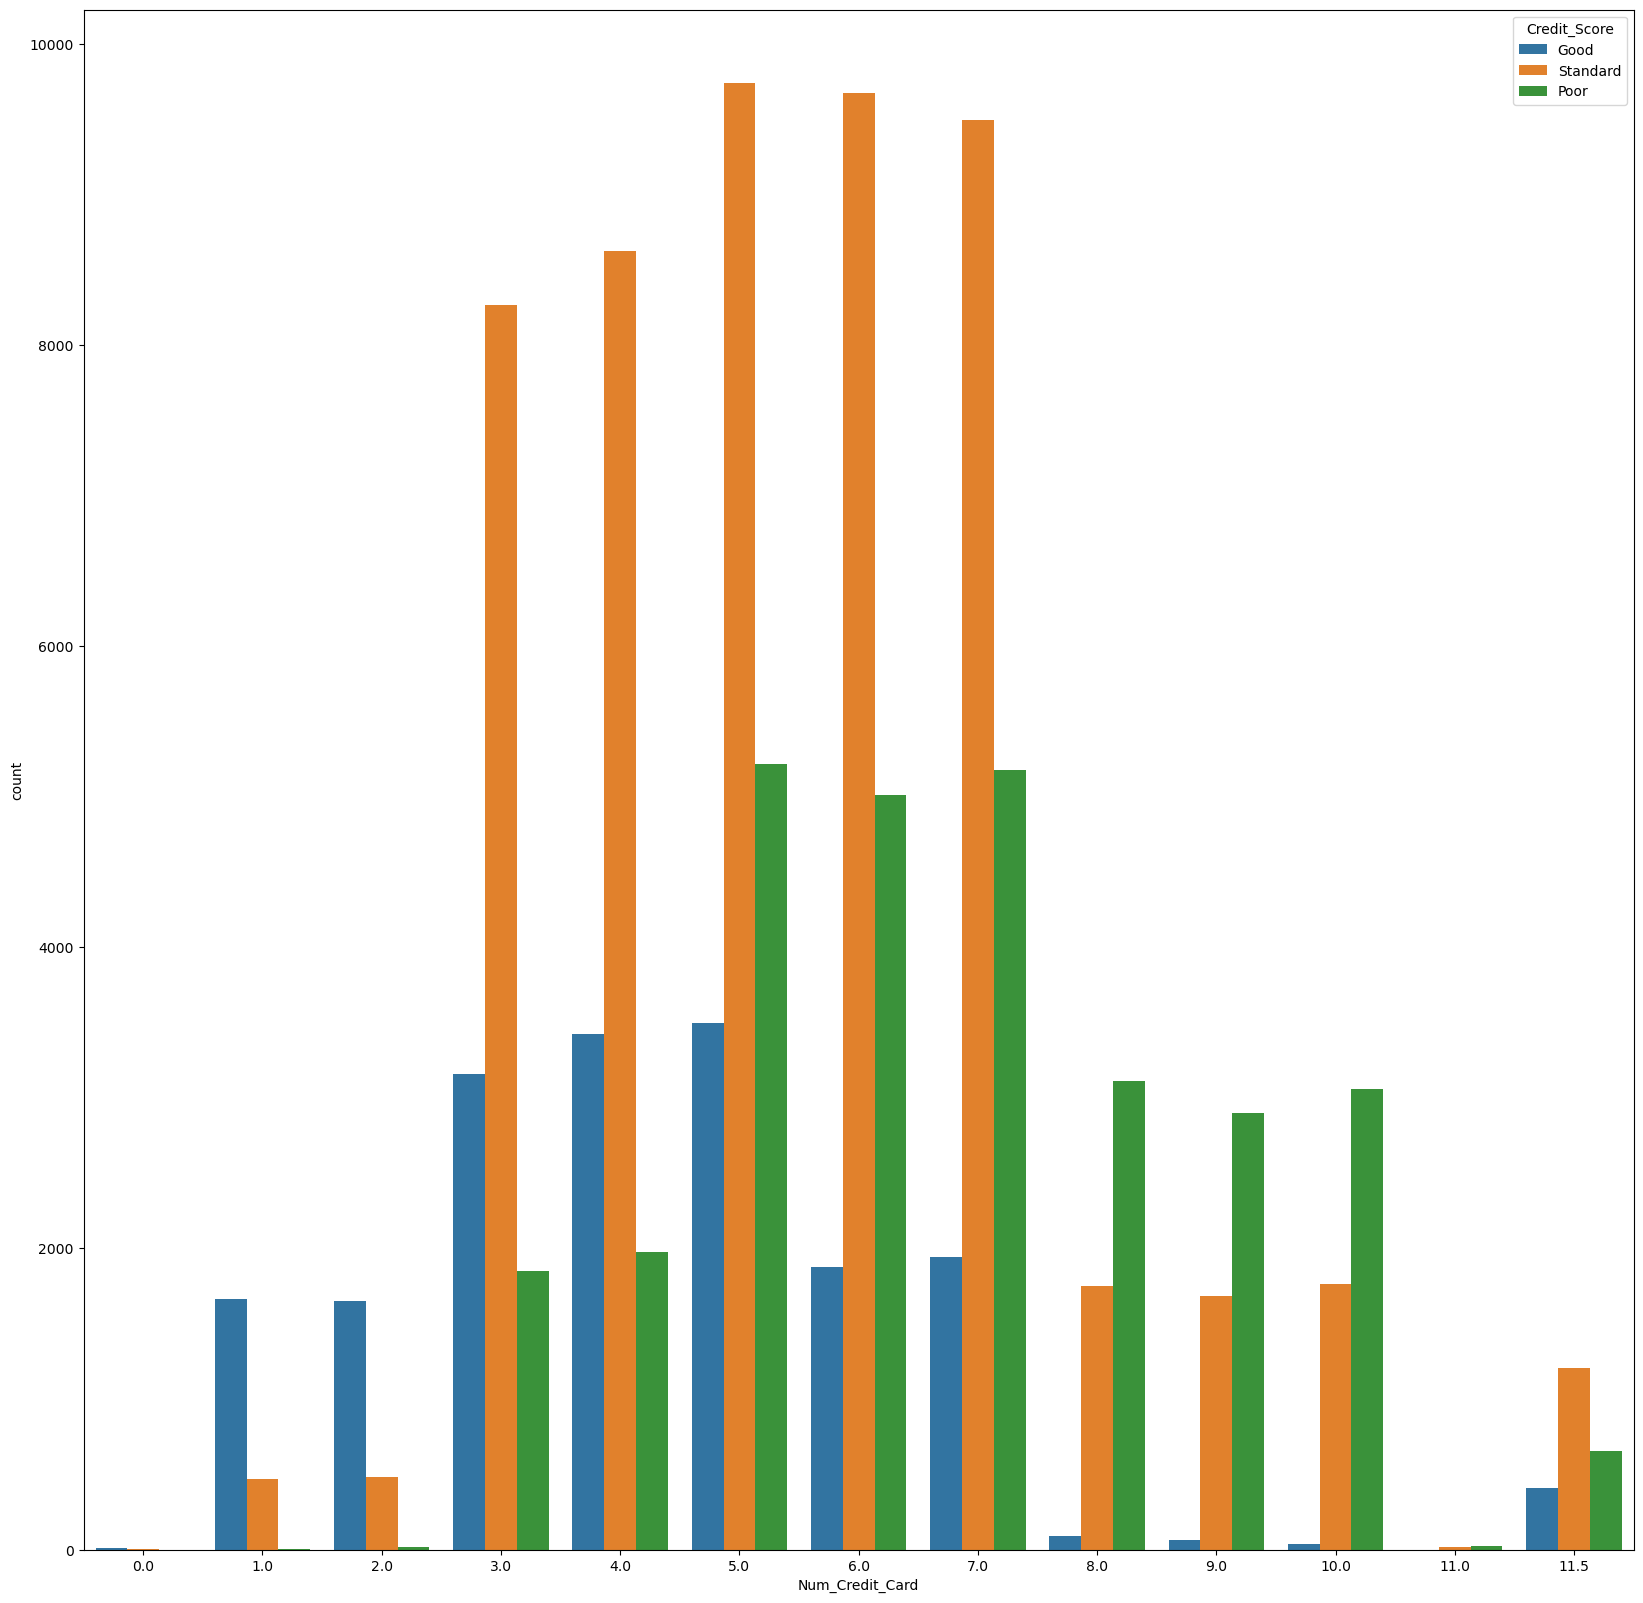

In [176]:
plt.figure(figsize = (20, 20))
sns.countplot(data = show1, x = 'Num_Credit_Card', hue = 'Credit_Score')

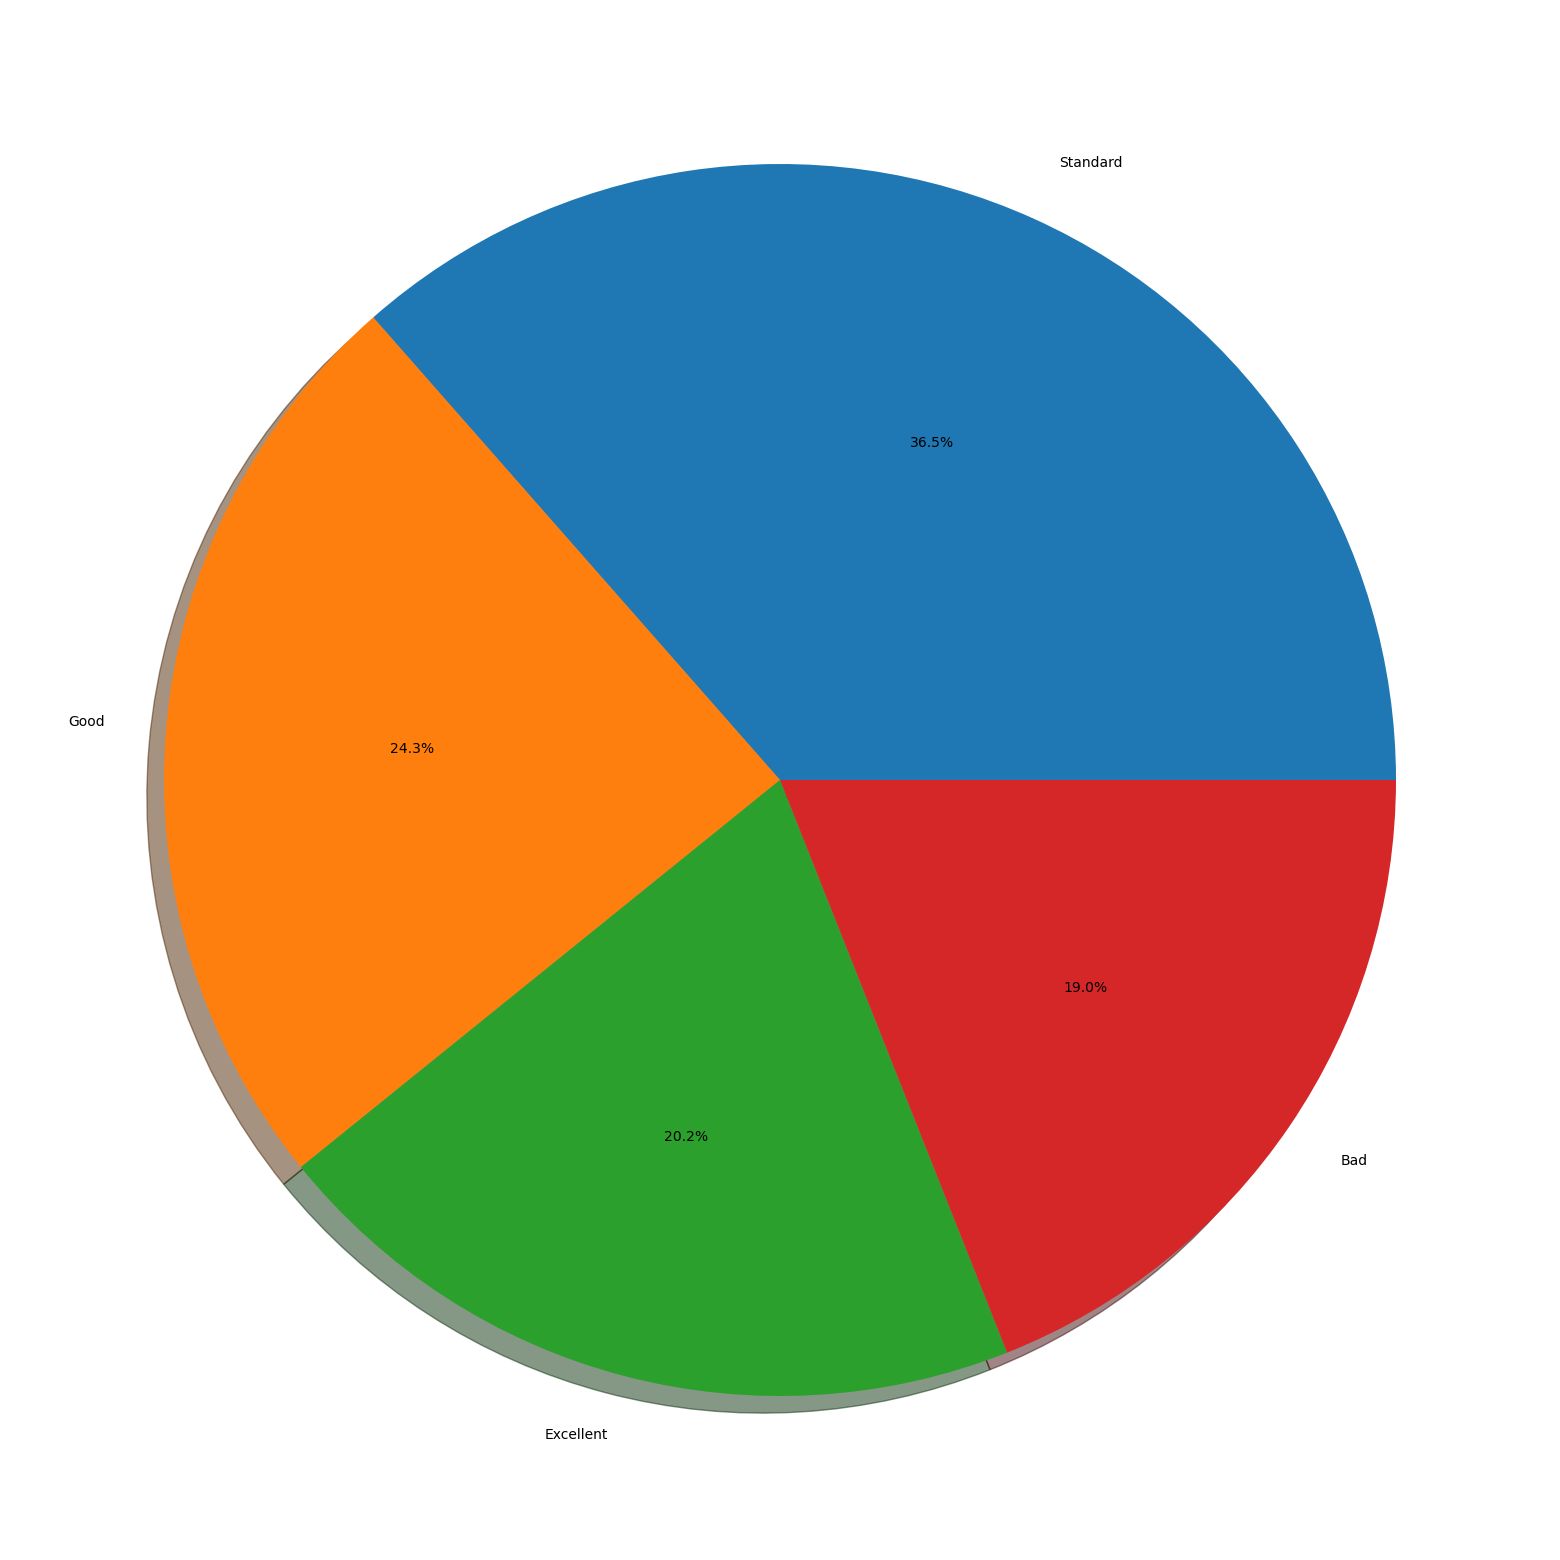

In [177]:
plt.figure(figsize = (20, 20))
label = show1.Credit_Mix.value_counts().index
label_count = show1.Credit_Mix.value_counts().values
plt.pie(data=show1, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

In [178]:
show1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

# Encoding Data

In [179]:
import datetime
show1['Month'] = show1['Month'].apply(lambda N: datetime.datetime.strptime(N, '%B').month)

In [180]:
show1['Occupation'].value_counts()

Data Scientist    7062
Lawyer            6575
Architect         6355
Engineer          6350
Scientist         6299
Mechanic          6291
Accountant        6271
Developer         6235
Media_Manager     6232
Teacher           6215
Entrepreneur      6174
Doctor            6087
Journalist        6085
Manager           5973
Musician          5911
Writer            5885
Name: Occupation, dtype: int64

In [181]:
show1 = pd.get_dummies(show1 , columns= ['Occupation'] , drop_first =True )


In [182]:
show1['Credit_Mix'].value_counts()

Standard     36479
Good         24337
Excellent    20195
Bad          18989
Name: Credit_Mix, dtype: int64

In [183]:
show1['Credit_Mix'] = show1['Credit_Mix'].map({'Bad':0,'Standard':1,'Good':2,'Excellent':3})

In [184]:
show1['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [185]:
show1['Payment_of_Min_Amount'] = show1['Payment_of_Min_Amount'].map({'Yes':0,'No':1,'NM':2})


In [186]:
show1['Credit_Score'].value_counts()


Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [187]:
show1['Credit_Score'] = show1['Credit_Score'].map({'Poor':0,'Standard':1,'Good':2})


In [188]:
show1['Credit_History_Years'].value_counts()


15 Years    12884
19 Years     4784
18 Years     4747
17 Years     4718
16 Years     4526
20 Years     3325
6 Years      3054
13 Years     3048
30 Years     2982
32 Years     2899
8 Years      2814
29 Years     2812
9 Years      2803
31 Years     2799
12 Years     2790
23 Years     2789
28 Years     2767
24 Years     2764
26 Years     2727
22 Years     2721
21 Years     2708
11 Years     2703
27 Years     2622
10 Years     2618
7 Years      2575
25 Years     2522
14 Years     2360
5 Years      2033
33 Years     1106
1 Years      1001
2 Years       938
3 Years       809
4 Years       762
0 Years       490
Name: Credit_History_Years, dtype: int64

In [189]:
show1 = pd.get_dummies(show1 , columns= ['Credit_History_Years'] , drop_first =True )


In [190]:
show1['Credit_History_Months'].value_counts()

11 Months    17076
10 Months     8026
5 Months      7972
4 Months      7950
3 Months      7925
8 Months      7901
2 Months      7894
9 Months      7884
0 Months      6920
1 Months      6885
6 Months      6829
7 Months      6738
Name: Credit_History_Months, dtype: int64

In [191]:
show1 = pd.get_dummies(show1 , columns= ['Credit_History_Months'] , drop_first =True )

In [192]:
show1['expenditure size'].value_counts()

Low_spent       49799
High_spent      42601
Medium_spent     7600
Name: expenditure size, dtype: int64

In [193]:
show1['expenditure size'] = show1['expenditure size'].map({'Low_spent':0,'Medium_spent':1,'High_spent':2})

In [194]:
show1['Payments volume'].value_counts()

Medium_value_payments    39001
Small_value_payments     36853
Large_value_payments     24146
Name: Payments volume, dtype: int64

In [195]:
show1['Payments volume'] = show1['Payments volume'].map({'Small_value_payments':0,'Medium_value_payments':1,'Large_value_payments':2})

In [196]:
def columns_info(show1):
    colms = []
    dtypes = []
    unique = []
    nunique = []
    nulls = []
    
    for colm in show1.columns:
        colms.append(colm)
        dtypes.append(show1[colm].dtypes)
        unique.append(show1[colm].unique())
        nunique.append(show1[colm].nunique())
        nulls.append(show1[colm].isna().sum())
        
    return pd.DataFrame({'Columns':colms ,
                         'Data Types': dtypes,
                         'Unique values':unique,
                         'Number of unique': nunique,
                         'missing values':nulls})  
columns_info(show1)

,Columns,Data Types,Unique values,Number of unique,missing values
0,Month,int64,"[1, 2, 3, 4, 5, 6, 7, 8]",8,0
1,Age,float64,"[23.0, 67.5, 28.0, 34.0, 54.0, 55.0, 21.0, 31....",44,0
2,Annual_Income,float64,"[19114.12, 34847.84, 143162.64, 30689.89, 3554...",12264,0
3,Monthly_Inhand_Salary,float64,"[1824.8433333333328, 3093.745000000001, 3037.9...",12559,0
4,Num_Bank_Accounts,int64,"[3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 13, 11]",13,0
5,Num_Credit_Card,float64,"[4.0, 11.5, 5.0, 1.0, 7.0, 6.0, 8.0, 3.0, 9.0,...",13,0
6,Interest_Rate,int64,"[3, 6, 8, 4, 5, 38, 15, 7, 12, 20, 1, 14, 32, ...",35,0
7,Num_of_Loan,int32,"[4, 1, 3, 12, 0, 2, 7, 5, 6, 8, 9]",11,0
8,Delay_from_due_date,int64,"[3, 0, 5, 6, 8, 7, 13, 10, 4, 9, 1, 12, 11, 30...",56,0
9,Num_of_Delayed_Payment,float64,"[7.0, 14.0, 4.0, 8.0, 6.0, 1.0, 3.0, 0.0, 5.0,...",30,0


# Machine Learning Part

# Preprocessing

In [197]:
from sklearn.feature_selection import SelectPercentile , chi2 , f_classif

In [198]:
X = show1.drop(columns='Credit_Score',axis=1)
y=show1['Credit_Score']

In [199]:
FS=SelectPercentile(score_func = chi2 , percentile=20)
X=FS.fit_transform(X,y)

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [201]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [202]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Classifier Model

# We will try to burn the outfitting 

- n_estimators : The number of trees in the forest.
- min_samples_split : The minimum number of samples required to split an internal node
- n_jobs : The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.
- random_state : Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features)

In [203]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=700,min_samples_split= 8,n_jobs=-1 ,random_state=2023)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [204]:
Score1=accuracy_score(y_test,y_pred)
print("Test score : ",Score1*100,"%")

Test score :  79.25 %


In [205]:
Score=RF.score(X_train,y_train)
print("Train score : ",Score*100,"%")

Train score :  94.9825 %


In [206]:
y_pred[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1],
      dtype=int64)

In [207]:
np.array(y_test[:20])

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1],
      dtype=int64)

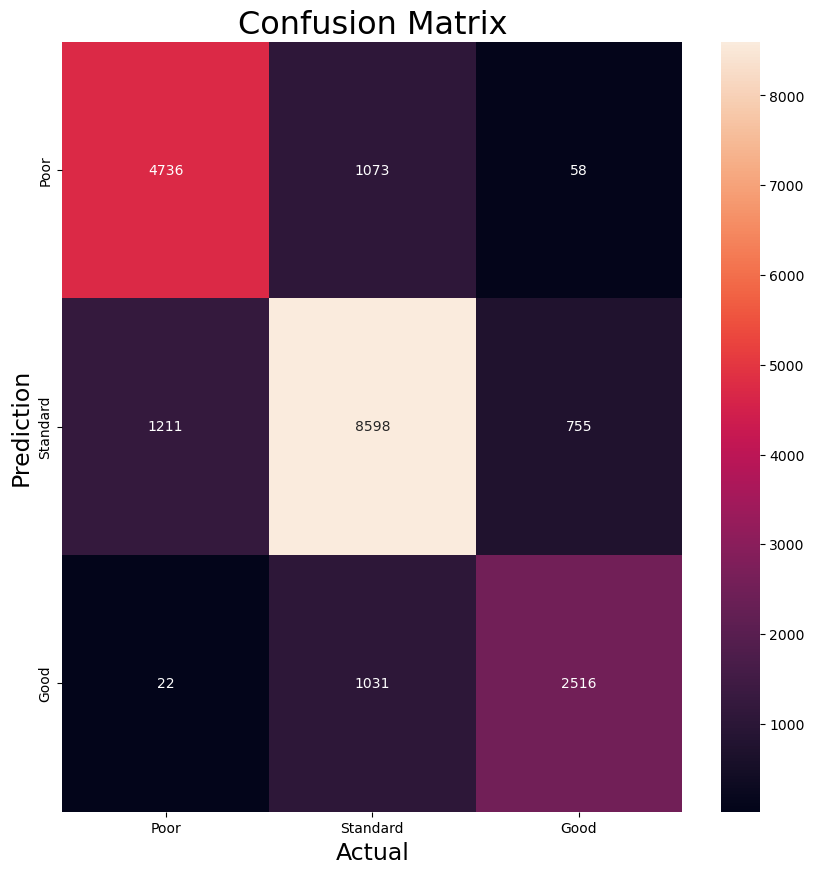

In [208]:

y_test1=np.array(y_test)
y_pred_rf=np.array(y_pred)

plt.figure(figsize = (10,10))
CM=confusion_matrix(y_test1,y_pred_rf)
labels = ["Poor", "Standard", "Good"]
sns.heatmap(CM,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [209]:
Report=classification_report(y_test, y_pred,output_dict=True)
df = pd.DataFrame(Report).transpose()


In [210]:
df

,precision,recall,f1-score,support
0,0.793433,0.807227,0.800270,5867.0000
1,0.803401,0.813896,0.808615,10564.0000
2,0.755783,0.704959,0.729487,3569.0000
accuracy,0.792500,0.792500,0.792500,0.7925
macro avg,0.784205,0.775361,0.779457,20000.0000
weighted avg,0.791979,0.792500,0.792047,20000.0000


# Support Vector Machine Model [SVC]

In [211]:
from sklearn.svm import SVC

In [212]:
svc_model=SVC(C=.4,gamma='auto',random_state=2023)

svc_model.fit(X_train,y_train)


SVC(C=0.4, gamma='auto', random_state=2023)

In [213]:
y_pred1=svc_model.predict(X_test)

In [214]:
Score1=accuracy_score(y_test,y_pred1)
print("Test score : ",Score1*100,"%")

Test score :  67.88499999999999 %


In [215]:
y_pred1[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1],
      dtype=int64)

In [216]:
np.array(y_test[:20])

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1],
      dtype=int64)

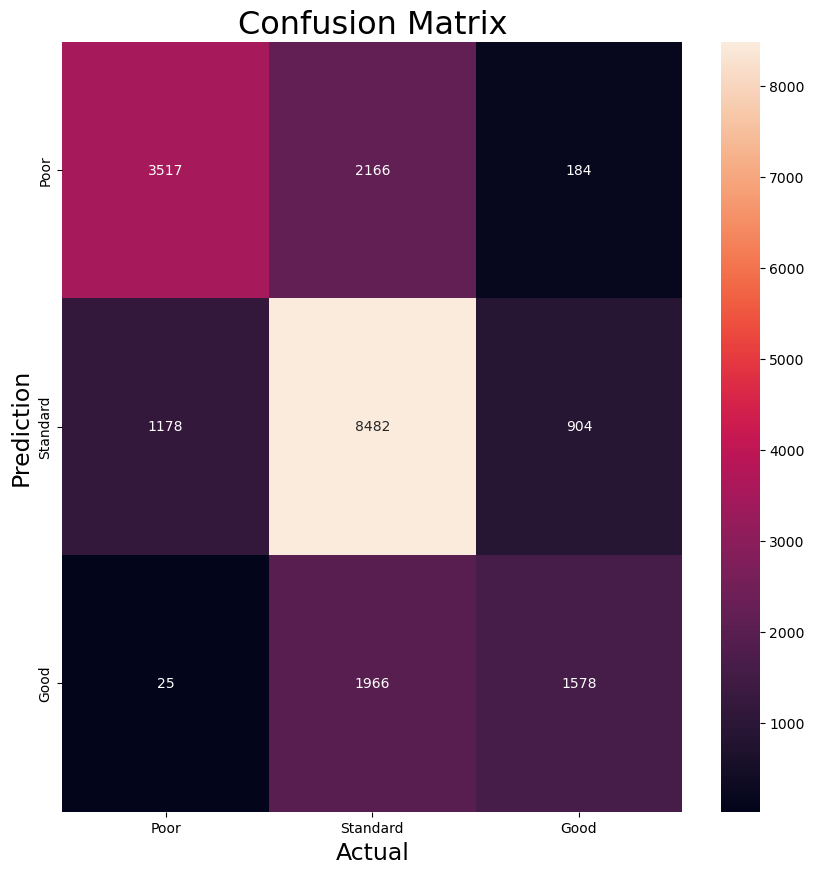

In [217]:
y_test2=np.array(y_test)
y_pred_svm=np.array(y_pred1)

plt.figure(figsize = (10,10))
CM1=confusion_matrix(y_test2,y_pred_svm)
labels = ["Poor", "Standard", "Good"]
sns.heatmap(CM1,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [218]:
Report1=classification_report(y_test, y_pred1,output_dict=True)
df1 = pd.DataFrame(Report1).transpose()
df1

,precision,recall,f1-score,support
0,0.745127,0.599455,0.664400,5867.00000
1,0.672427,0.802916,0.731901,10564.00000
2,0.591898,0.442141,0.506175,3569.00000
accuracy,0.678850,0.678850,0.678850,0.67885
macro avg,0.669818,0.614837,0.634158,20000.00000
weighted avg,0.679383,0.678850,0.671819,20000.00000


# KNN [Classifier]

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
neigh = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [221]:
y_pred2=neigh.predict(X_test)
Score2=accuracy_score(y_test,y_pred2)
print("Test score : ",Score2*100,"%")

Test score :  70.11 %


In [222]:
y_pred2[:20]


array([1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1],
      dtype=int64)

In [223]:
np.array(y_test[:20])

array([1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1],
      dtype=int64)

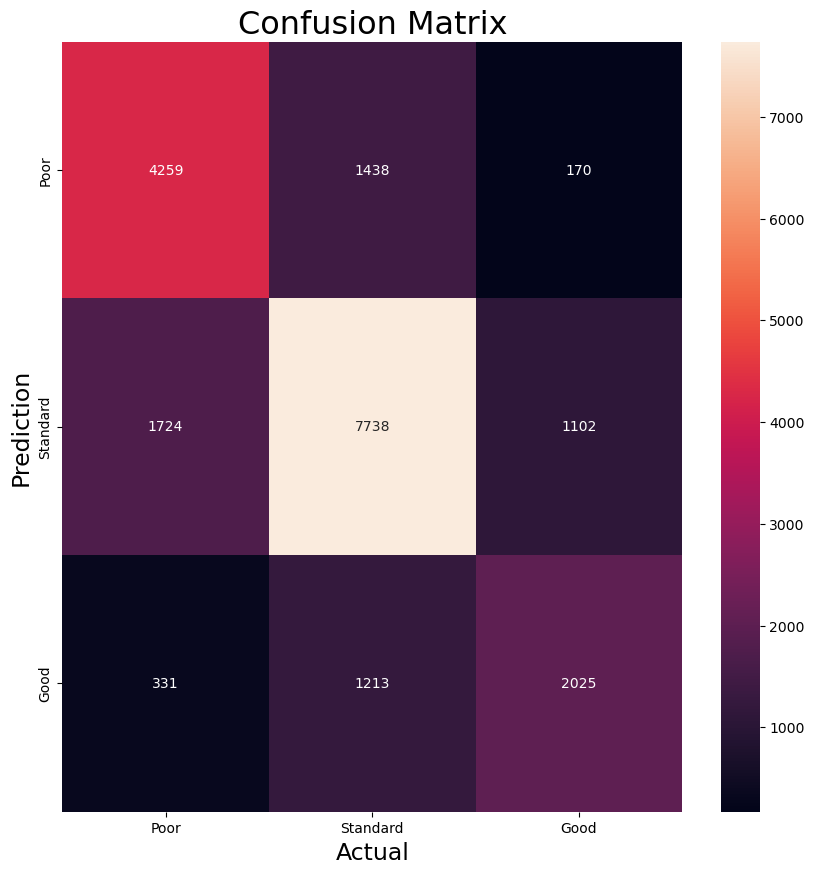

In [224]:
y_test3=np.array(y_test)
y_pred_knn=np.array(y_pred2)

plt.figure(figsize = (10,10))
CM2=confusion_matrix(y_test3,y_pred_knn)
labels = ["Poor", "Standard", "Good"]
sns.heatmap(CM2,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=17)
plt.xlabel('Actual',fontsize=17)
plt.title('Confusion Matrix',fontsize=23)
plt.show()

In [225]:
Report2=classification_report(y_test, y_pred2,output_dict=True)
df2 = pd.DataFrame(Report2).transpose()
df2

,precision,recall,f1-score,support
0,0.674533,0.725925,0.699286,5867.0000
1,0.744826,0.732488,0.738605,10564.0000
2,0.614195,0.567386,0.589863,3569.0000
accuracy,0.701100,0.701100,0.701100,0.7011
macro avg,0.677851,0.675266,0.675918,20000.0000
weighted avg,0.700894,0.701100,0.700528,20000.0000
